# AirBnB data project
The project will be divided into several parts:
- 1 Business Understanding
- 2 Data Understanding
- 3 Data Preparation
- 4 Modeling
- 5 Evaluation
- 6 Deploy



## 1 Business Understanding
Host always wants to earn more money

Airbnb always intrigued me. The company uses a crowdsourcing model to 'replace' hotel and provide hosts' properties to travelers in need. Of course, using this model, the traveling cost becomes significantly cheaper since they are no longer required to pay fees such as service charge.
 ###  房屋经营者如何挣更多的钱？
 +   一年当中，那个时间是淡季、那些时间是旺季，价格如何变化？
     + 同区域、同类型房子，价格在一年中如何变化？
 +   在淡季，提高入住率。
     + 如何提高入住率？
     + 入住率和那些因素有关？
         + What prompt us to choose your property within the huge listing at Airbnb?
         + Is reviews helpful for choosing airbnb?
         + 点评分数和入住率有关吗？
         + 点评分数和那些因素有关？
 +   在旺季，更高的价格
     + 旺季，游客更关注什么？
     + 不关注的地方，是否可以节省可变成本？

## 2 Data Understanding
It includes the following steps:
  -  Data gethering
  -  Data assessment

In order to get a better understanding of the data I will be looking at throughout this project, I will check the characteristics of the dataset. First, let's read in the data and necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline


### 2.1 Data Gethering
Kaggle provides the Airbnb Seattle datasets, I download them for the analysis.

In [2]:
calendar = pd.read_csv("./seattle/calendar.csv")
listings = pd.read_csv("./seattle/listings.csv")
reviews = pd.read_csv("./seattle/reviews.csv")

### 2.2 Data assessment
  1. Get the number of rows and columns in this dataset.
      - 1) Get the shape 
      - 2) Get the data type and memory use
      - 3) Get rows example 
  2. Assess missing values distribution
      - 1) Get missing values distribution of columns/rows
      - 2) Get a set of column names that have no missing values.
      - 3) Get a set of column names that have more than target percents(e.g. 40%) if their values missing.
      - 4) Get a set of column names that have less than target percents if their values missing. They need to be imputed.
  3. Assess unique value for column. if it is unique value, the column can be removed.
  4. classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue. Get the following lists:
      - 1) drop columns list
      - 2) fullfill columns list
      - 3) imputation columns list
  4. Assess values distribution for object type.
      - 1) Check non-numeric columns
      - 2) Select columns to inspect further if columns are unclear in step 1.


In [3]:
def get_base_info(df):
    """
     The function is created to get the number of rows and columns in this dataset.
      - 1) Get the shape 
      - 2) Get the data type and memory use
      - 3) Get the rows example 
     Input:
        df: Dataframe, dataset 
     Return:
        NA
    """
    #Get the shape
    rows_num, columns_num=df.shape
    print( "The dataset contains {} rows and {} columns\n".format( rows_num,columns_num))
    
    #Get the data type and memory use
    if type(calendar) != pd.DataFrame:
        print("It is {},not a DataFrame. exit!".format(type(df)))
        return
    # Show all columns
    original_max_rows_setting= pd.options.display.max_rows
    pd.options.display.max_rows=columns_num
    df.info()
    # restore the orignal setting
    pd.options.display.max_rows=original_max_rows_setting
    
    # Get the rows example 
    show_rows(df)

def show_rows(df,n=5):
    #Get the shape
    rows_num, columns_num=df.shape
    # Show all columns
    original_max_rows_setting= pd.options.display.max_rows
    # Get the rows example 
    if pd.options.display.max_columns > columns_num:
        print("\nShow the dataset example:")
        print(df.head(n))
    else:
        print("\ncolum number is too large. Transpose the columns to show 3 rows")
        if pd.options.display.max_columns > columns_num:
            print( df.iloc[:3,:].T)
        else:
            pd.options.display.max_rows = columns_num
            print(pd.options.display.max_rows)
            print( df.iloc[:3,:].T)
            pd.options.display.max_rows = original_max_rows_setting

In [4]:
def assess_missing_value(df,drop_threshold=40):
    """
    Function description: Assess missing values distribution
      - 1) Get missing values distribution of columns/rows
      - 2) Get a set of column names that have no missing values.
      - 3) Get a set of column name that have more than target percents(e.g. 75%) if their values missing.
    Input:
        df: Dataframe, dataset 
    Return:
        full_cols_list: list, the columns lists has no misssing values.  
        most_missing_cols_list: list, the columns lists has  missing rate is greater than drop_threshold.  
        impute_cols_list: list, the columns lists has missing rate less than target percents if their values missing. 
                          They need to be imputed. 
    """
    #1) Get missing values distribution of columns and rows
    #  Check columns distribution
    bins=[0,5,10,15,20,25,30,40,50,60,70,80,100]
    df_missing_rate=df.isnull().mean()*100
    missing_col_cuts=pd.cut(df_missing_rate,bins)
    plt.figure(figsize=(8,5))
    pd.value_counts(missing_col_cuts, sort=False).plot('bar', title="Columns distribution with missing value percentage")
    #  Check rows distribution
    plt.figure(figsize=(8,5))
    df_missing_row=df.isnull().mean(axis=1)*100
    df_missing_row_cuts=pd.cut(df_missing_row,bins)
    pd.value_counts(df_missing_row_cuts, sort=False).plot('bar',title="Rows distribution with missing value percentage" )

    #2) Get a set of column names that have no missing values.
    # analyze missing data rate for columns in listings
    full_cols_list=df_missing_rate[df_missing_rate==0].index.values.tolist()
    
    #3) Get a set of column name that have more than target percents(e.g. 75%) if their values missing.
    most_missing_cols_list=df_missing_rate[df_missing_rate>drop_threshold].index.values.tolist()
    
    #4) Get a set of column names that have less than target percents if their values missing. They need to be imputed.
    impute_cols_list=df_missing_rate[((df_missing_rate<=drop_threshold)&(df_missing_rate>0))].index.values.tolist()
    
    return full_cols_list, most_missing_cols_list,impute_cols_list

def get_missing_rate(df,column_name):
    return df[column_name].isnull().mean()*100
    

In [5]:
def assess_unique_value(df):
    """
    Function description: 
        Assess unique value for column. if it is unique value, the column can be removed.
    Input:
        df: Dataframe, dataset 
    Return:
        unique_cols_list: list, the columns list that have unique value. It is useless in the analysis.    
    """
    # scan all columns, i is column position. Store value count in a colum
    value_count=[df.iloc[:,i].unique().size for i in range(df.shape[1])]
    # value_count = 1 : means unique value in a column. find out the column position  list and flatten to 1 D array.
    unique_col_id =np.argwhere(np.array(value_count) == 1).flatten()
    # get the columns list that have unique value
    unique_cols_list=df.iloc[:,unique_col_id].columns.values.tolist()
    return unique_cols_list

In [6]:
# The following functions are used for classifying by actions
def union_cols_list(list1,list2):
    return list(set(list1) | set(list2))
def intersection_cols_list(list1,list2):
    return list(set(list1) & set(list2))
def minus_cols_list(list1,list2):
    return list(set(list1) - set(list2))
def print_cols_list(list,action):
    print("\n{} {} columns are following:\n {}".format(len(list),action,list))
    
# if there is only one elememnt in list, convert the list to a value, or keep the list
flexiable_list= lambda x: x[0]if len(x)==1 else x

In [7]:
def check_nonnumeric_cols(df):
    """
    Function description: Check non-numeric columns. 
    Input:
        df: Dataframe, dataset 
    Return:
        nonnumeric_cols_list: list, the columns list whose type is nonnumeric. It may be category.  
    """
    # Get colum type is nonnumeric(string and others)
    cat_df=df.select_dtypes(include=['object'])
    show_rows(cat_df)
    nonnumeric_cols_list = cat_df.columns.values.tolist()
    return nonnumeric_cols_list

In [8]:
def assess_nonnumeric(df, column_name):
    """
    Function description: 
       Assess values distribution for Category type. if it is unique value, the column can be removed.
    Input:
        df: Dataframe, dataset 
        column_name: colum name to be assessed.
    Return:
        col_desc: pandas.DataFrame, the value distribution for the column.   
    """
    plt.figure(figsize=(12,5))
    value_dist =df[column_name].value_counts() # value_count can handle NaN value but seaborn cannot.
    value_dist=(value_dist/df.shape[0])
    value_dist.plot(kind="bar" );
    plt.title("values distribution of {} columns".format(column_name))
    
    # return statics info
    print("The number of missing value of {} columns is:{} ".format(column_name,df[column_name].isnull().sum()))
    print("The {} columns type is:{} ".format(column_name,df[column_name].dtypes))
    a = df[column_name].describe().reset_index()
    b = value_dist[:4].reset_index()
    c = value_dist[-4:].reset_index()
    col_desc=pd.concat([a,b])
    col_desc=pd.concat([col_desc,c])
    return col_desc

In [9]:
def check_numeric_cols(df):
    """
    Function description: Check numeric columns. 
    Input:
        df: Dataframe, dataset 
    Return:
        numeric_cols_list: list, the columns list whose type is nonnumeric. It may be category.  
    """
    # Get colum type is nonnumeric(string and others)
    num_df=df.select_dtypes(exclude=['object'])
    show_rows(num_df)
    numeric_cols_list = num_df.columns.values.tolist()
    return numeric_cols_list

In [10]:
def assess_full_numeric(df, num_full_cols_list):
    """
    Function description: 
       Assess values distribution for columns with no missing value. 
    Input:
        df: Dataframe, dataset 
        num_full_cols_list:full numeric columns to be assessed.
    Return:
        NA   
    """
    for col in num_full_cols_list:
        plt.figure(figsize=(10,8))
        sns.distplot(df[col], label=col)
        plt.title('Distribution for full numeric column: {}'.format(col))
        plt.legend();

In [11]:
check_nonnumeric_cols(calendar)


Show the dataset example:
         date available   price
0  2016-01-04         t  $85.00
1  2016-01-05         t  $85.00
2  2016-01-06         f     NaN
3  2016-01-07         f     NaN
4  2016-01-08         f     NaN


['date', 'available', 'price']

#### 2.2.1 Assess calendar dataset

In [12]:
get_base_info(calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB

Show the dataset example:
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN



3 no missing columns are following:
 ['listing_id', 'date', 'available']

0 most missing columns are following:
 []

1 imputing columns are following:
 ['price']


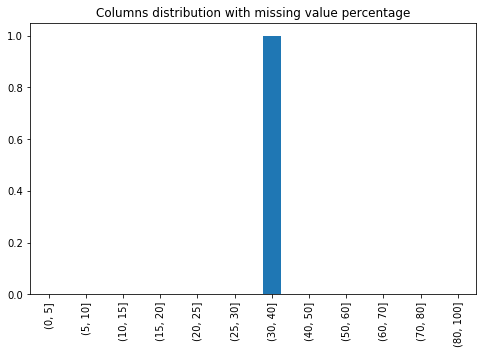

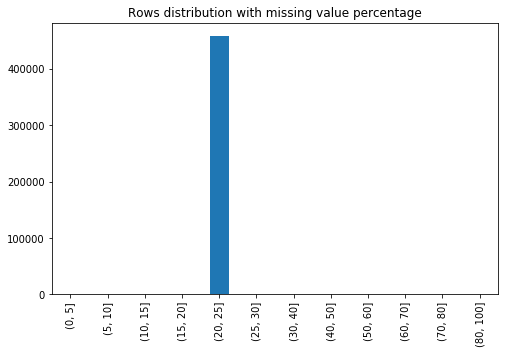

In [13]:
full_cols_c, most_missing_cols_c , impute_cols_c=assess_missing_value(calendar)
print_cols_list(full_cols_c,'no missing')
print_cols_list(most_missing_cols_c,'most missing')
print_cols_list(impute_cols_c,'imputing')

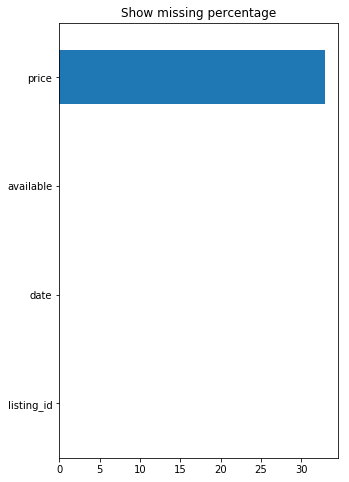

In [14]:
 #show missing percentage barh
(calendar.isnull().mean()*100).sort_values(ascending=True)[-30:].plot.barh(title="Show missing percentage",figsize=(5,8));

In [15]:
unique_cols_c=assess_unique_value(calendar)
print_cols_list(unique_cols_c,'unique')


0 unique columns are following:
 []


In [16]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_c_list=calendar.columns.values.tolist()
drop_cols_c=union_cols_list(most_missing_cols_c,unique_cols_c)
keep_cols_c=minus_cols_list(all_cols_c_list,drop_cols_c)
keep_full_cols_c=intersection_cols_list(keep_cols_c,full_cols_c)
keep_impute_cols_c=intersection_cols_list(keep_cols_c,impute_cols_c)

print_cols_list(drop_cols_c,'dropping')
print_cols_list(keep_full_cols_c,'no missing')
print_cols_list(keep_impute_cols_c,'imputing')


0 dropping columns are following:
 []

3 no missing columns are following:
 ['available', 'listing_id', 'date']

1 imputing columns are following:
 ['price']


In [17]:
print(get_missing_rate(calendar,'price'))

32.9389983998


In [18]:
pd.to_datetime(calendar['date']).describe()

count                 1393570
unique                    365
top       2016-12-27 00:00:00
freq                     3818
first     2016-01-04 00:00:00
last      2017-01-02 00:00:00
Name: date, dtype: object

In [19]:
c_nonnumeric_cols_list=check_nonnumeric_cols(calendar)


Show the dataset example:
         date available   price
0  2016-01-04         t  $85.00
1  2016-01-05         t  $85.00
2  2016-01-06         f     NaN
3  2016-01-07         f     NaN
4  2016-01-08         f     NaN


In [20]:
a = calendar['available'].describe().reset_index()
b = calendar['available'].value_counts().reset_index()
c=pd.concat([a,b])
c

index available
0   count   1393570
1  unique         2
2     top         t
3    freq    934542
0       t    934542
1       f    459028

The number of missing value of available columns is:0 
The available columns type is:object 


index available
0   count   1393570
1  unique         2
2     top         t
3    freq    934542
0       t   0.67061
1       f   0.32939
0       t   0.67061
1       f   0.32939

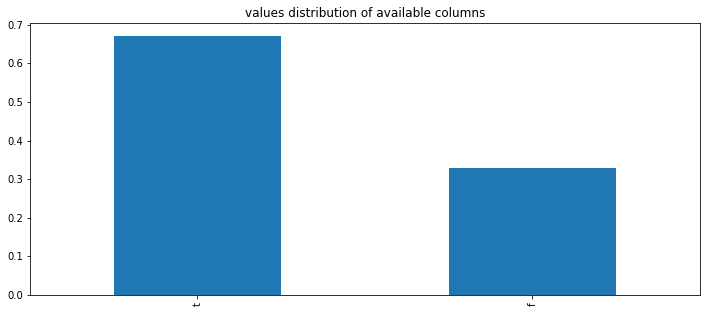

In [21]:
assess_nonnumeric(calendar,'available')

The number of missing value of price columns is:459028 
The price columns type is:object 


index        price
0    count       934542
1   unique          669
2      top      $150.00
3     freq        36646
0  $150.00    0.0262965
1  $100.00    0.0227868
2   $75.00    0.0213983
3  $125.00    0.0197608
0  $683.00  7.17581e-07
1  $423.00  7.17581e-07

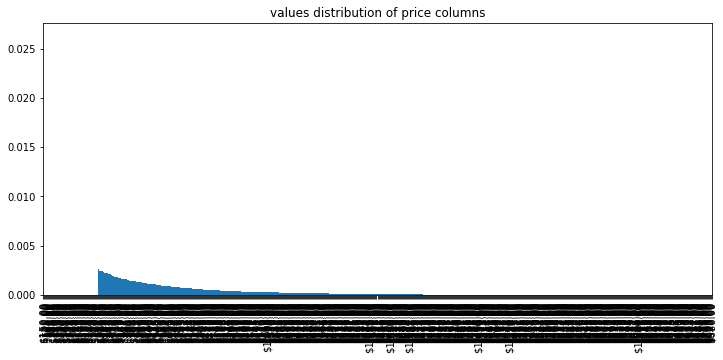

In [22]:
assess_nonnumeric(calendar,'price')[:10]

### Conclusion
 - No missing value columns: listing_id ,date ,available
      - data colum should be converted to datatime type.
      - available column should be convert to bool type.
 - Price column with about missing value. they miss value while available is false. the rows with missing price value can be set to 0. Special char e.g. '$ ,' should be removed. the column should be coverted to float type.

 

#### 2.2.2 Assess listings dataset

In [23]:
get_base_info(listings)

The dataset contains 3818 rows and 92 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null 


47 no missing columns are following:
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'experiences_offered', 'picture_url', 'host_id', 'host_url', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count']

6 most missing columns are following:
 ['notes', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'license']

39 

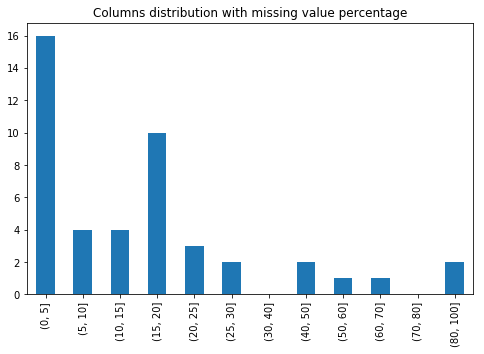

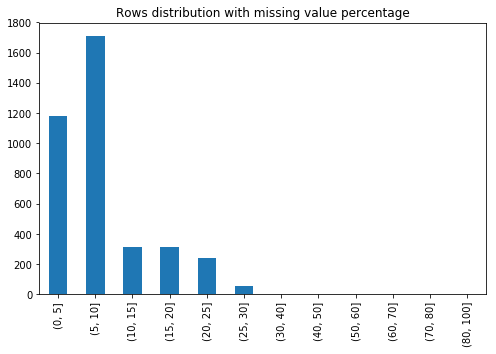

In [24]:
full_cols_l, most_missing_cols_l , impute_cols_l=assess_missing_value(listings)
print_cols_list(full_cols_l,'no missing')
print_cols_list(most_missing_cols_l,'most missing')
print_cols_list(impute_cols_l,'imputing')

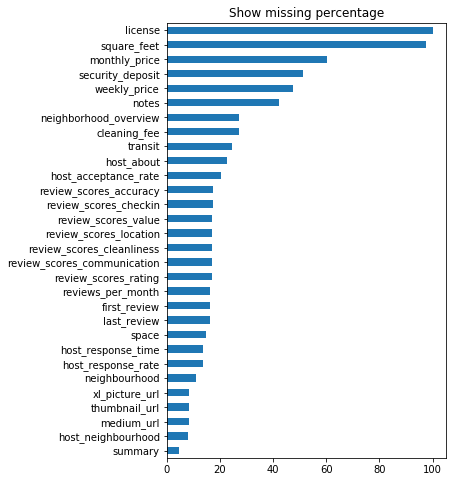

In [25]:
 #show missing percentage barh
(listings.isnull().mean()*100).sort_values(ascending=True)[-30:].plot.barh(title="Show missing percentage",figsize=(5,8));

In [26]:
unique_cols_l=assess_unique_value(listings)
print_cols_list(unique_cols_l,'unique')


11 unique columns are following:
 ['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'license', 'jurisdiction_names']


In [27]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_l_list=listings.columns.values.tolist()
drop_cols_l=union_cols_list(most_missing_cols_l,unique_cols_l)
keep_cols_l=minus_cols_list(all_cols_l_list,drop_cols_l)
keep_full_cols_l=intersection_cols_list(keep_cols_l,full_cols_l)
keep_impute_cols_l=intersection_cols_list(keep_cols_l,impute_cols_l)

print_cols_list(drop_cols_l,'dropping')
print_cols_list(keep_full_cols_l,'no missing')
print_cols_list(keep_impute_cols_l,'imputing')


16 dropping columns are following:
 ['requires_license', 'square_feet', 'calendar_last_scraped', 'scrape_id', 'country', 'country_code', 'weekly_price', 'license', 'jurisdiction_names', 'security_deposit', 'market', 'experiences_offered', 'has_availability', 'notes', 'last_scraped', 'monthly_price']

37 no missing columns are following:
 ['calendar_updated', 'availability_30', 'require_guest_phone_verification', 'state', 'price', 'is_location_exact', 'minimum_nights', 'city', 'room_type', 'id', 'number_of_reviews', 'host_url', 'description', 'longitude', 'picture_url', 'street', 'cancellation_policy', 'latitude', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'name', 'extra_people', 'availability_60', 'host_id', 'instant_bookable', 'host_verifications', 'accommodates', 'amenities', 'listing_url', 'availability_365', 'require_guest_profile_picture', 'smart_location', 'availability_90', 'maximum_nights', 'bed_type', 'guests_included', 'calculated_host_listings_count']

39 imp

In [28]:
num_full_cols_list=check_numeric_cols(listings[keep_full_cols_l])
len(num_full_cols_list)


Show the dataset example:
   availability_30  minimum_nights       id  number_of_reviews   longitude  \
0               14               1   241032                207 -122.371025   
1               13               2   953595                 43 -122.365666   
2                1               4  3308979                 20 -122.369483   
3                0               1  7421966                  0 -122.369279   
4               30               1   278830                 38 -122.372471   

    latitude  availability_60   host_id  accommodates  availability_365  \
0  47.636289               41    956883             4               346   
1  47.639123               13   5177328             4               291   
2  47.629724                6  16708587            11               220   
3  47.638473                0   9851441             3               143   
4  47.632918               60   1452570             6               365   

   availability_90  maximum_nights  guests_included  

14

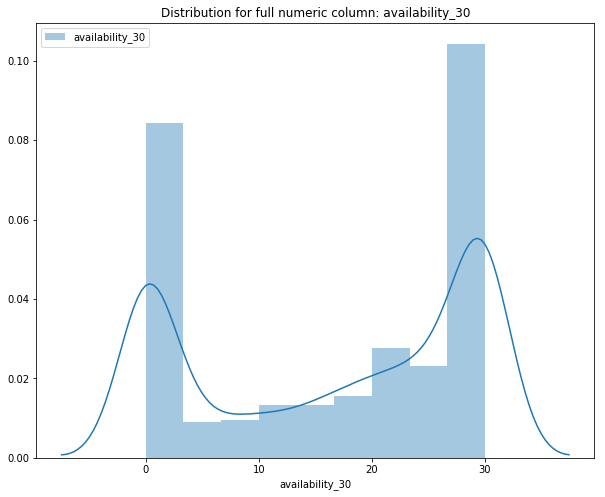

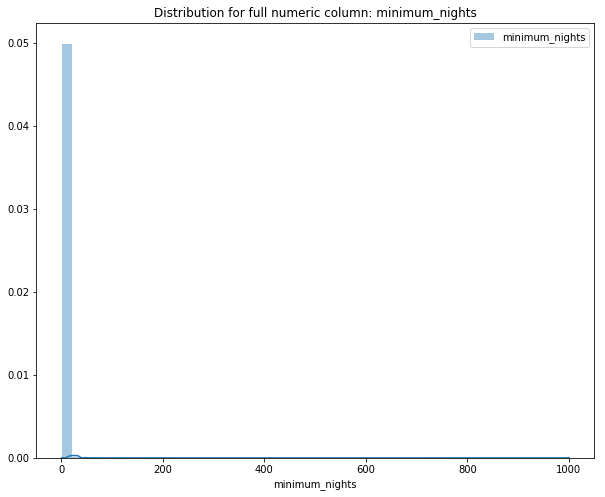

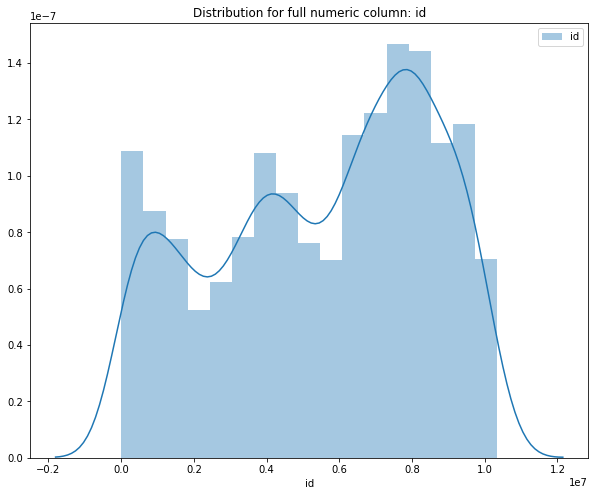

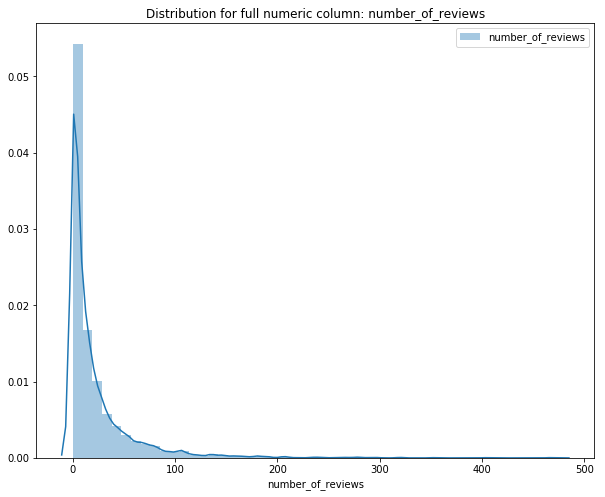

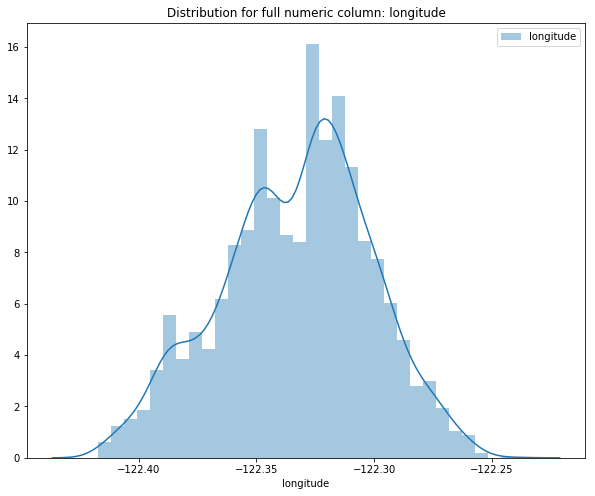

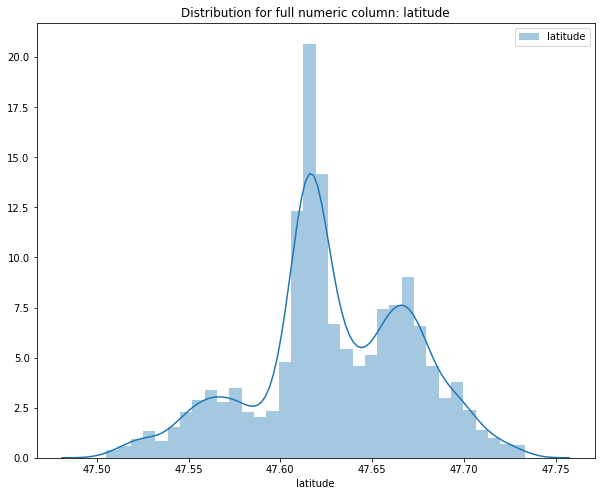

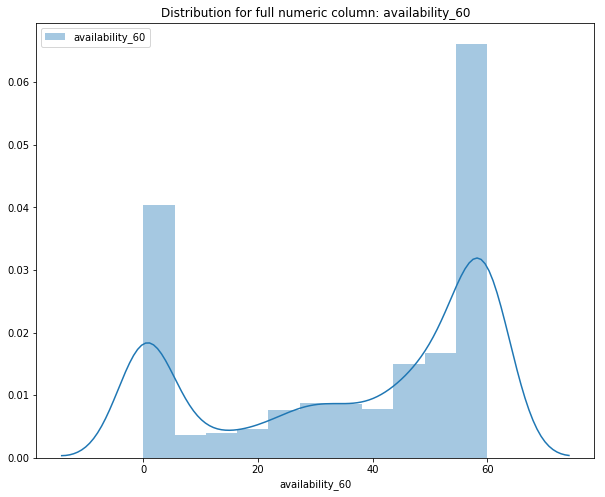

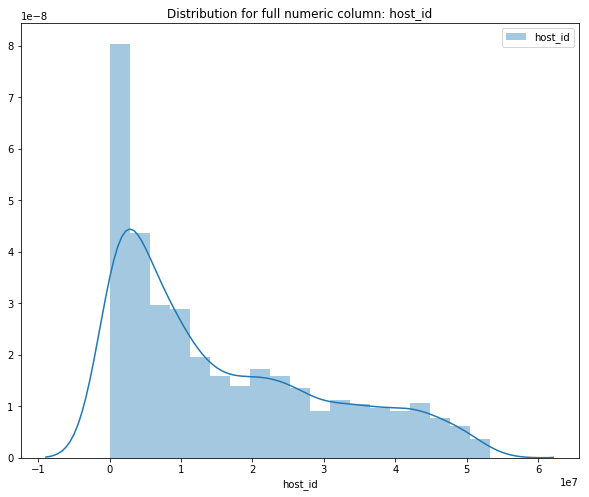

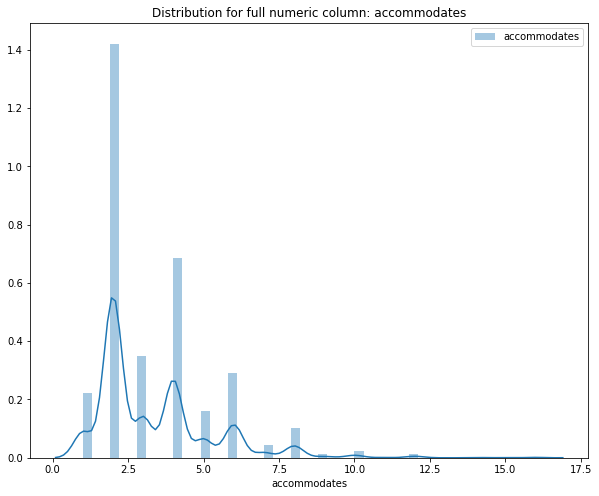

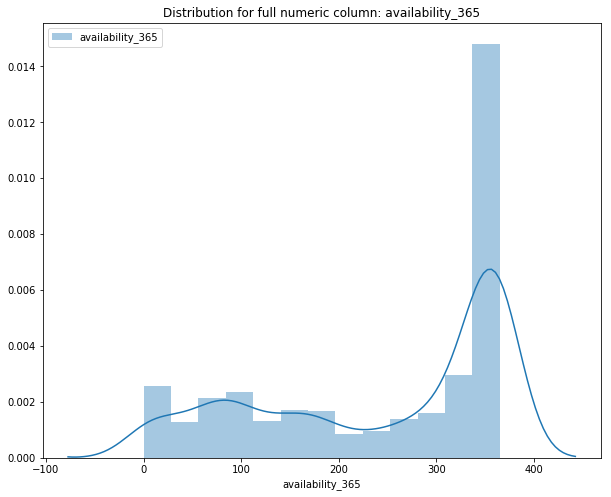

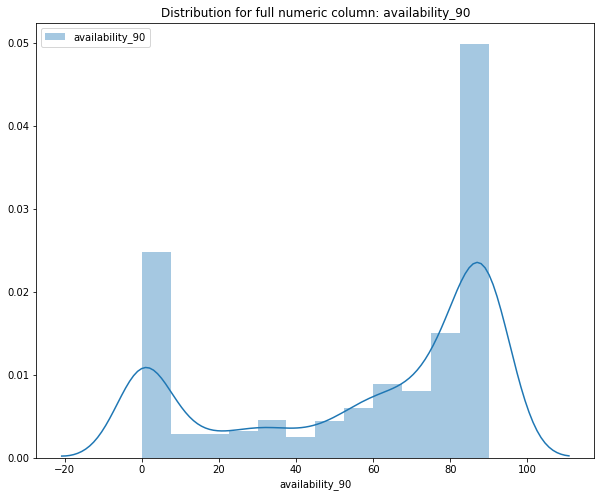

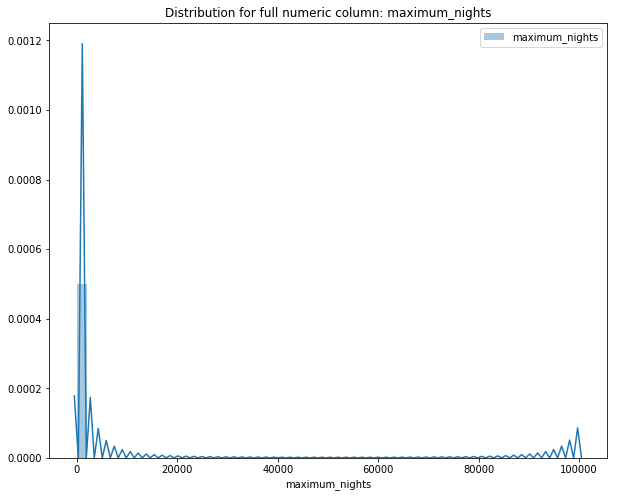

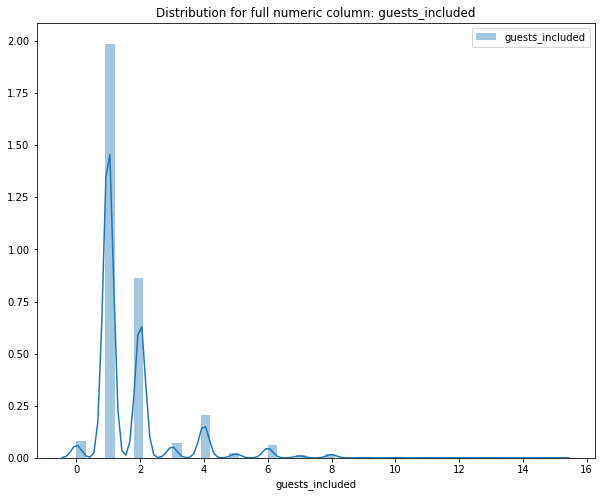

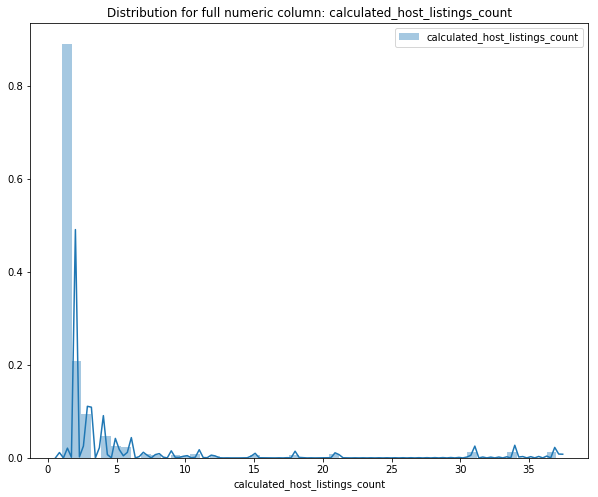

In [29]:
assess_full_numeric(listings,num_full_cols_list)

In [30]:
num_impute_cols_list=check_numeric_cols(listings[keep_impute_cols_l])
len(num_impute_cols_list)


Show the dataset example:
   review_scores_rating  review_scores_location  bathrooms  \
0                  95.0                     9.0        1.0   
1                  96.0                    10.0        1.0   
2                  97.0                    10.0        4.5   
3                   NaN                     NaN        1.0   
4                  92.0                     9.0        2.0   

   review_scores_checkin  review_scores_cleanliness  \
0                   10.0                       10.0   
1                   10.0                       10.0   
2                   10.0                       10.0   
3                    NaN                        NaN   
4                   10.0                        9.0   

   review_scores_communication  host_listings_count  reviews_per_month  beds  \
0                         10.0                  3.0               4.07   1.0   
1                         10.0                  6.0               1.48   1.0   
2                         10.

13

In [31]:
l_nonnumeric_cols_list=check_nonnumeric_cols(listings[keep_full_cols_l])


colum number is too large. Transpose the columns to show 3 rows
23
                                                                                  0  \
calendar_updated                                                        4 weeks ago   
require_guest_phone_verification                                                  f   
state                                                                            WA   
price                                                                        $85.00   
is_location_exact                                                                 t   
city                                                                        Seattle   
room_type                                                           Entire home/apt   
host_url                                   https://www.airbnb.com/users/show/956883   
description                       Make your self at home in this charming one-be...   
picture_url                       https://a1.muscache.com/ac/p

In [32]:
(listings['require_guest_phone_verification']==listings['require_guest_profile_picture']).mean()*100

97.852278679937143

The number of missing value of is_location_exact columns is:0 
The is_location_exact columns type is:object 


index is_location_exact
0   count              3818
1  unique                 2
2     top                 t
3    freq              3412
0       t          0.893662
1       f          0.106338
0       t          0.893662
1       f          0.106338

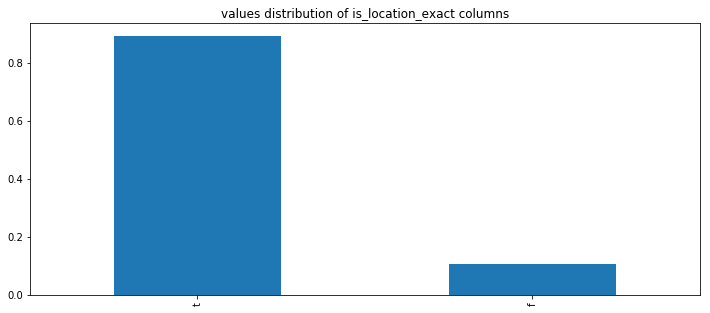

In [33]:
assess_nonnumeric(listings,'is_location_exact')

In [34]:
l_nonnumeric_impute_cols_list=check_nonnumeric_cols(listings[keep_impute_cols_l])


colum number is too large. Transpose the columns to show 3 rows
26
                                                                        0  \
host_has_profile_pic                                                    t   
cleaning_fee                                                          NaN   
zipcode                                                             98119   
host_thumbnail_url      https://a0.muscache.com/ac/users/956883/profil...   
neighborhood_overview                                                 NaN   
host_picture_url        https://a0.muscache.com/ac/users/956883/profil...   
host_is_superhost                                                       f   
summary                                                               NaN   
transit                                                               NaN   
host_acceptance_rate                                                 100%   
first_review                                                   2011-11-01   
medium_u

The number of missing value of host_response_time columns is:523 
The host_response_time columns type is:object 


index host_response_time
0               count               3295
1              unique                  4
2                 top     within an hour
3                freq               1692
0      within an hour           0.443164
1  within a few hours           0.253536
2        within a day           0.156365
3  a few days or more         0.00995285
0      within an hour           0.443164
1  within a few hours           0.253536
2        within a day           0.156365
3  a few days or more         0.00995285

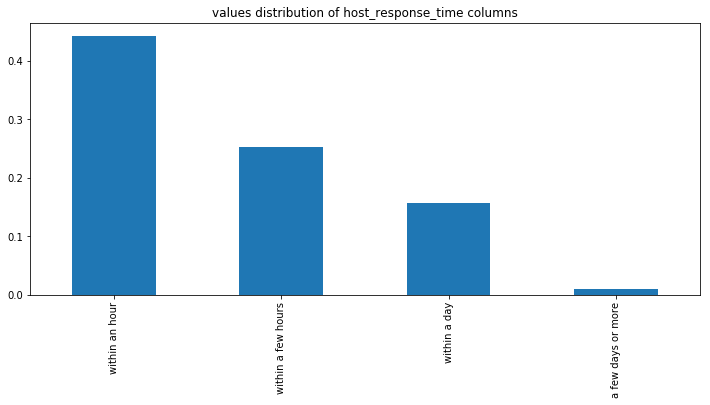

In [35]:
assess_nonnumeric(listings,'host_response_time')

The number of missing value of require_guest_profile_picture columns is:0 
The require_guest_profile_picture columns type is:object 


index require_guest_profile_picture
0   count                          3818
1  unique                             2
2     top                             f
3    freq                          3497
0       f                      0.915925
1       t                     0.0840754
0       f                      0.915925
1       t                     0.0840754

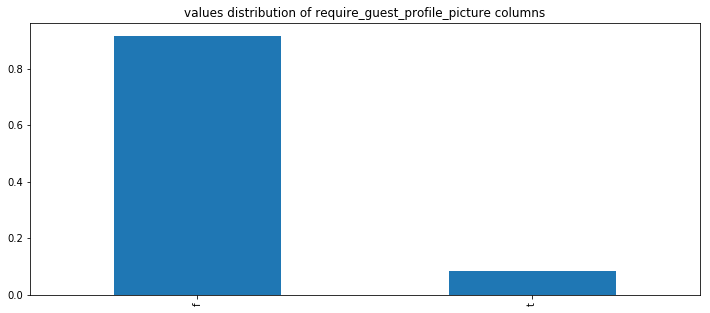

In [36]:
assess_nonnumeric(listings,'require_guest_profile_picture')

The number of missing value of property_type columns is:1 
The property_type columns type is:object 


index property_type
0        count          3817
1       unique            16
2          top         House
3         freq          1733
0        House      0.453903
1    Apartment      0.447355
2    Townhouse     0.0309062
3  Condominium     0.0238345
0    Treehouse   0.000785752
1       Chalet   0.000523834
2         Dorm   0.000523834
3         Yurt   0.000261917

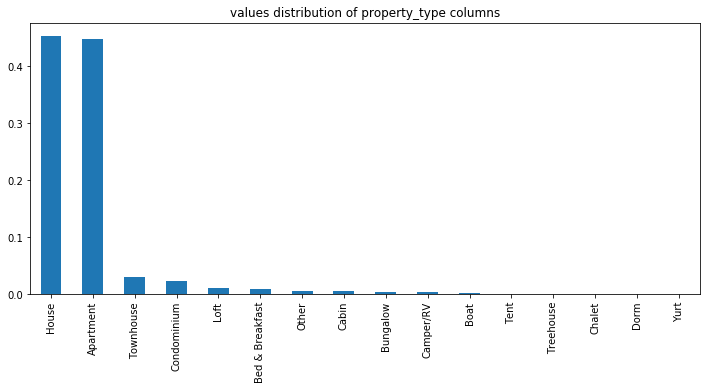

In [37]:
assess_nonnumeric(listings,'property_type')

In [38]:
listings['property_type'].isnull().mean()

0.00026191723415400735

The most important property_type are following. others can be skipped.
- House              0.453903
- Apartment          0.447355
- Townhouse          0.030906
- Condominium        0.023834
- Loft               0.010477

The number of missing value of calendar_updated columns is:0 
The calendar_updated columns type is:object 


index calendar_updated
0          count             3818
1         unique               34
2            top            today
3           freq              706
0          today         0.184914
1    2 weeks ago        0.0908853
2    3 weeks ago        0.0785752
3   2 months ago        0.0735987
0  30 months ago      0.000261917
1  15 months ago      0.000261917
2  16 months ago      0.000261917
3  17 months ago      0.000261917

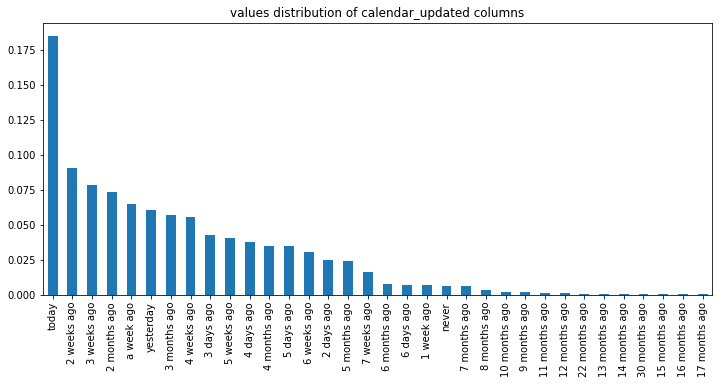

In [39]:
assess_nonnumeric(listings,'calendar_updated')

The number of missing value of room_type columns is:0 
The room_type columns type is:object 


index        room_type
0            count             3818
1           unique                3
2              top  Entire home/apt
3             freq             2541
0  Entire home/apt         0.665532
1     Private room         0.303824
2      Shared room        0.0306443
0  Entire home/apt         0.665532
1     Private room         0.303824
2      Shared room        0.0306443

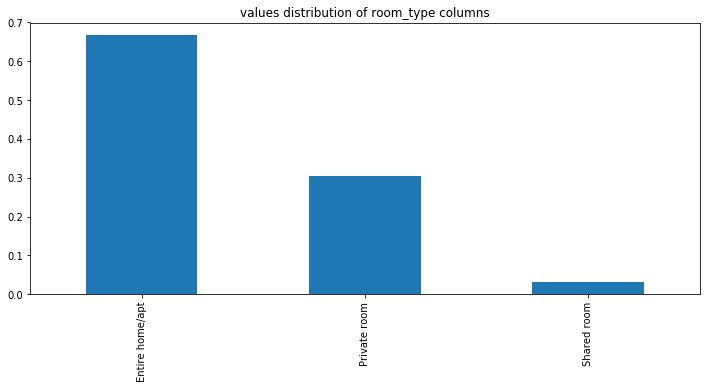

In [40]:
assess_nonnumeric(listings,'room_type')

The number of missing value of cancellation_policy columns is:0 
The cancellation_policy columns type is:object 


index cancellation_policy
0     count                3818
1    unique                   3
2       top              strict
3      freq                1417
0    strict            0.371137
1  moderate            0.327658
2  flexible            0.301205
0    strict            0.371137
1  moderate            0.327658
2  flexible            0.301205

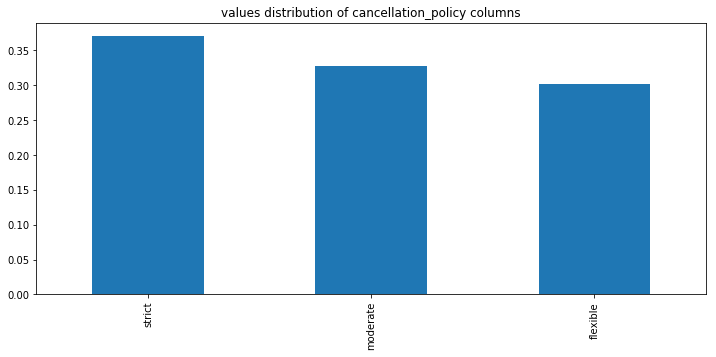

In [41]:
assess_nonnumeric(listings,'cancellation_policy')

The number of missing value of neighbourhood_group_cleansed columns is:0 
The neighbourhood_group_cleansed columns type is:object 


index neighbourhood_group_cleansed
0                count                         3818
1               unique                           17
2                  top          Other neighborhoods
3                 freq                          794
0  Other neighborhoods                     0.207962
1         Capitol Hill                     0.148507
2             Downtown                     0.138816
3         Central Area                    0.0966475
0            Lake City                    0.0175485
1             Magnolia                     0.015977
2          Seward Park                    0.0115244
3             Interbay                   0.00288109

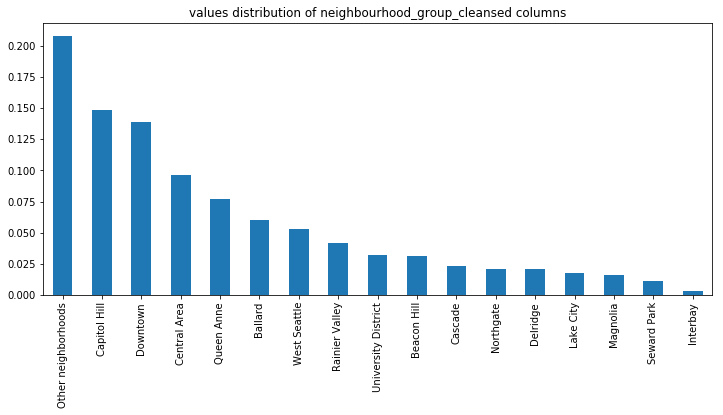

In [42]:
assess_nonnumeric(listings,'neighbourhood_group_cleansed')

The number of missing value of neighbourhood_cleansed columns is:0 
The neighbourhood_cleansed columns type is:object 


index neighbourhood_cleansed
0              count                   3818
1             unique                     87
2                top               Broadway
3               freq                    397
0           Broadway               0.103981
1           Belltown              0.0612886
2        Wallingford              0.0437402
3            Fremont              0.0413829
0          Pinehurst             0.00104767
1  South Beacon Hill             0.00104767
2         South Park            0.000785752
3            Roxhill            0.000523834

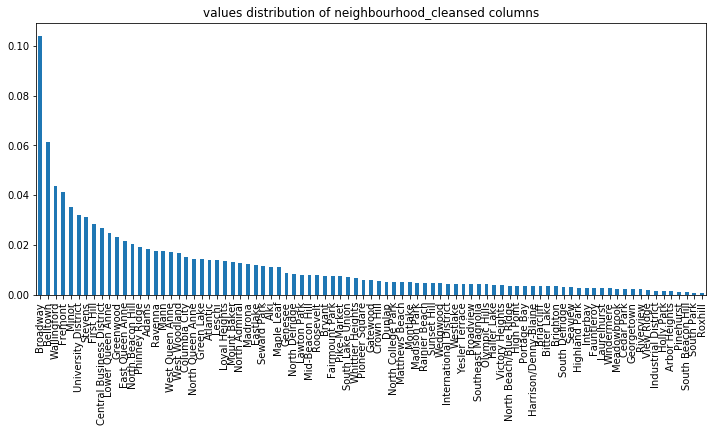

In [43]:
assess_nonnumeric(listings,'neighbourhood_cleansed')

The number of missing value of zipcode columns is:7 
The zipcode columns type is:object 


index      zipcode
0      count         3811
1     unique           28
2        top        98122
3       freq          420
0      98122     0.110005
1      98103     0.103195
2      98102    0.0887899
3      98105    0.0589314
0      98178   0.00183342
1      98134   0.00130959
2      98146   0.00130959
3  99\n98122  0.000261917

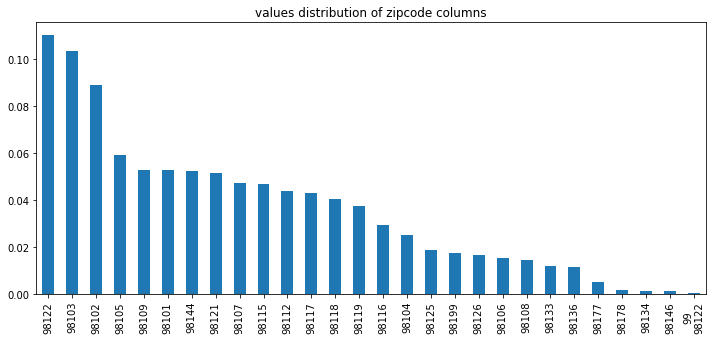

In [44]:
assess_nonnumeric(listings,'zipcode')

In [45]:
#creating a dictionary of each amenities and the count value
from collections import Counter
amenities_tmp_list=[]
for i in listings.amenities.tolist():
    tmp=i.replace('\"','')
    tmp=tmp.replace('{','')
    tmp=tmp.replace('}','')
    amenities_tmp_list.append(tmp.split(','))
amenities_list = []
for i in amenities_tmp_list:
    for j in i:
        amenities_list.append(j)
amenities_count = Counter(amenities_list)
amenities_count_dict = dict(amenities_count)

In [130]:
#creating a dataframe with amenities and the number of houses providing the amenities
count_dict = {'amenities_available': list(amenities_count_dict.keys()), 'num_amenities': list(amenities_count_dict.values())}
amenities_count_df = pd.DataFrame.from_dict(count_dict)
amenities_count_df[amenities_count_df['amenities_available'] == ''] = np.nan
amenities_count_df.sort_values(by = 'num_amenities', ascending = False, inplace = True)
amenities_count_df.head()

amenities_available  num_amenities
36   Wireless Internet         3667.0
23             Heating         3627.0
14             Kitchen         3423.0
35      Smoke Detector         3281.0
32          Essentials         3237.0

### Conclusion
 - The following 16 columns coming from 6 most Missing columns union 11 columns with unique value will be dropped.
     - ['security_deposit', 'last_scraped', 'market', 'license', 'has_availability', 'country_code', 'calendar_last_scraped', 'country', 'monthly_price', 'weekly_price', 'notes', 'requires_license', 'square_feet', 'jurisdiction_names', 'scrape_id', 'experiences_offered']
 - 37 no missing columns :(14 numeric columns, 23 nonnumeric columns), 23 nonnumeric columns are following:
     - 'smart_location','state','city' are also a column with unique value, because more thant 99% value is same. other value seem has the same meaning. so these columns will be removed.
     - 95% 'bed_type' is real bed, so I think it is a column with unique value. It can be dropped.
     - 'description','name' are descripsive columns, they can be dropped.
     - 'amenities' describes a basic configuration in room, they can be convert to amenities length. and it will be handled specially later.
     - 'neighbourhood_cleansed','street' will be dropped because other location colums provides similar information.
     - 'host_verifications' will be dropped because host_identity_verified provides same information.
     - 'require_guest_profile_picture' will be dropped because more thant 97.85% value is same as require_guest_phone_verification
     - 'calendar_updated'  will be dropped because review dataset provides similar information.
     - 'host_url','listing_url'and 'picture_url' will be dropped because they provide less predictive information.
     - 'is_location_exact','require_guest_phone_verification','instant_bookable' are bool type and need imputation.
     - 'neighbourhood_group_cleansed',	'room_type','cancellation_policy' are string/category type and need be converted to  dummies variable.

 - 39 imputing columns :(13 numeric columns, 26 nonnumeric columns), 26 nonnumeric columns are following:
      - 'summary' are  duplicated colum and can be dropped because they are decomposed into more specific features thereafter. 
      - 'host_about','host_picture_url','neighborhood_overview','transit','host_name','space','host_location', 'host_has_profile_pic'  are descripsive columns, they have little impact on predictions and can be ignored.
      - 'last_review','first_review' are 	duplication	information and can be ignored. Review dataset also includes them.
      - 'neighbourhood' are duplication	information and can be ignored.		other colums provides similar information.
      - 'host_neighbourhood','host_thumbnail_url','xl_picture_url' are less prediction. They provide less predictive information.
      - 'host_is_superhost','host_identity_verified' are bool type and need to be	imputed.
      - 'host_response_time' is category type and need to be	imputed.
      - 'host_response_rate','host_acceptance_rate' are numeric type and need to be imputed.
      - 'cleaning_fee' is numeric type and need to be imputed as most frequent value.
      - 'host_since' are numeric type and can be converted to years since beginning.
      - 'zipcode','property_type','host_response_time' are category type  and need to be	imputed. zipcode has invisible char and can be corrected. And proper_type has incorrect value(e.g. Bed & Breakfast), but the ratio is small and can be ignored.
      - 'medium_url','thumbnail_url' are category type and can be converted to  1 if value exit, or 0. it means airbnb are linked to social medium.

#### 2.2.3 Assess reviews dataset

In [47]:
get_base_info(reviews)

The dataset contains 84849 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84832 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB

Show the dataset example:
   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a


5 no missing columns are following:
 ['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name']

0 most missing columns are following:
 []

1 imputing columns are following:
 ['comments']


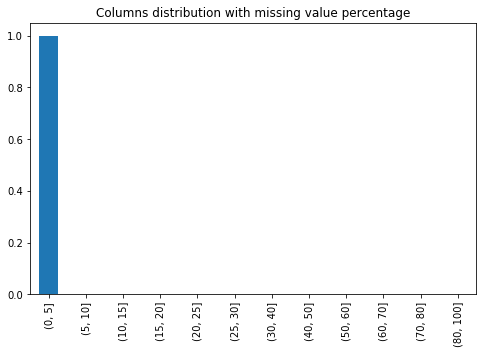

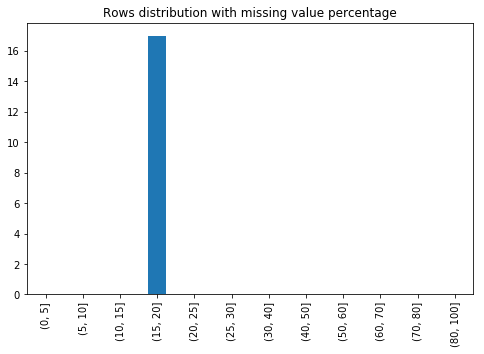

In [48]:
full_cols_r, most_missing_cols_r , impute_cols_r=assess_missing_value(reviews)
print_cols_list(full_cols_r,'no missing')
print_cols_list(most_missing_cols_r,'most missing')
print_cols_list(impute_cols_r,'imputing')

In [49]:
unique_cols_r=assess_unique_value(reviews)
print_cols_list(unique_cols_r,'unique')


0 unique columns are following:
 []


In [50]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_r_list=reviews.columns.values.tolist()
drop_cols_r=union_cols_list(most_missing_cols_r,unique_cols_r)
keep_cols_r=minus_cols_list(all_cols_r_list,drop_cols_r)
keep_full_cols_r=intersection_cols_list(keep_cols_r,full_cols_r)
keep_impute_cols_r=intersection_cols_list(keep_cols_r,impute_cols_r)

print_cols_list(drop_cols_r,'dropping')
print_cols_list(keep_full_cols_r,'no missing')
print_cols_list(keep_impute_cols_r,'imputing')



0 dropping columns are following:
 []

5 no missing columns are following:
 ['id', 'reviewer_id', 'listing_id', 'reviewer_name', 'date']

1 imputing columns are following:
 ['comments']


In [51]:
#%debug
check_nonnumeric_cols(reviews[keep_full_cols_r])


Show the dataset example:
  reviewer_name        date
0        Bianca  2015-07-19
1         Frank  2015-07-20
2           Ian  2015-07-26
3        George  2015-08-02
4          Ming  2015-08-10


['reviewer_name', 'date']

### Conclusion for review dataset
The dataset contains 84849 rows and 6 columns.
- 5 no missing columns are following:
  - 'listing_id', 'id',  'reviewer_id' are numeric columns.
  - 'date' column should be converted to datetime type.
  - 'reviewer_name' column provides duplicated information and reviewer_id can replace it.
  - 1 imputing columns are 'comments'. but missing value in comment cannot be imputed. but we can count it as occupation rate. so it can convert to bool type.
  
  


## 3 Data Preparation
 - Prepare lists for data clean
     - create column handling list based on data assessment.because these original columns shows as other types.
     - classify by types : verify data type based on classification
         - numeric columns list
         - datetime columns list
         - bool columns list
         - category columns list
 - Data Clean
     - drop columns or rows
     - handle data type of columns. Check if any columns are of different data types than you would expect ex: 
           - 1) numbers showing as strings
           - 2) String includes invisible char.
         
 - Select and Re-Encode Features
      
      Check the columns of the dataset. For numeric and interval data, these features can be kept without changes. Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (kept without any changes). Special handling may be necessary for the remaining two variable types: categorical, and 'mixed' columns.
 
     - Convert to target date type.
     - Re-Encode Categorical Features. Category columns get dummies. Depending on the number of categories, perform one of the following:
       - binary (two-level) categoricals with numeric values: do nothing.
       - binary variable with non-numeric values: re-encode the values as numbers or create a dummy variable.
       - Multi-level categoricals (three or more values): encode the values using multiple dummy variables or just drop them from the analysis. As always, document the choices in the Discussion section.
     - Engineer Mixed-Type Features
       - There are a handful of features that are marked as "mixed" columns in the dataset that require special treatment in order to be included in the analysis.
     - Complete Feature Selection.   To summarize, the dataframe should consist of the following:
       - All numeric, interval, and ordinal type columns from the original dataset.
       - Binary categorical features (all numerically-encoded).
       - Engineered features from other multi-level categorical features and mixed features.
     
 - Feature transforming
     - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
     - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
     - Apply Feature Scaling
       - Normalize
       - Standardize
        

In [52]:
def initial_classify_types(df,drop_cols_list):
    """
    function description:
      Get the inital dtype columns.
    Input:
        df:Dateframe, the target dataframe.
        drop_cols_list: drop columns list based on value distribution.
    Return:
        result: dict={dtype:list}, get the initial information from dataset.
    """
    result={}
    dtype_dict={'datetime':'datetime','numeric':np.number,'bool':'bool','category':'object'}
    for k,v in dtype_dict.items():
         result[k]=df.select_dtypes(include=[v]).columns.values.tolist()
            
    # drop colum names also is removed from target after creating intial resut.
    for k, v in result.items():
        result[k]=minus_cols_list(result[k],drop_cols_list)   
    return result

In [53]:
def adjust_cols_list(df,assess_result,drop_cols_list): 
    """
    function description:
      classify by types : 
      - Get the inital dtype columns.
      - adjust dtype columns list based on the assessment result
    Input:
        assess_result:dict={dtype:list}, assessment result of dataset.
        drop_cols_list: drop columns list based on value distribution.
    Return:
        dtype_dict: dict={dtype:list},adjusted dtype dict based on the assessment result
    """
    # Get the inital dtype columns.
    dtypes_dict=initial_classify_types(df,drop_cols_list)
    # union for same data type, minus for diff data type
    for k, v in dtypes_dict.items():
        for ak,av in assess_result.items():
            if k == ak :
                dtypes_dict[k]=union_cols_list(dtypes_dict[k],assess_result[ak])
            elif ak !='drop':
                dtypes_dict[k]=minus_cols_list(dtypes_dict[k],assess_result[ak]) 
                
    # drop colum names also is removed from target after adjusting dtypes_dict.
    for k, v in dtypes_dict.items():
        dtypes_dict[k]=minus_cols_list(dtypes_dict[k],assess_result['drop'])
    
    # create the total drop columns list
    dtypes_dict['drop'] = assess_result['drop']+drop_cols_list
    # show result
    for k, v in dtypes_dict.items():
        print_cols_list(dtypes_dict[k],k)
   
    return dtypes_dict

In [54]:
"""
verify data type for columns
Check if any columns are of different data types than you would expect ex:
1) numbers showing as strings
2) String includes invisible char.
"""
def del_series_special_char(df_series, special_char,target_char=''):
    return df_series.str.replace(special_char,target_char) 

def del_df_special_char(df, special_char_string='$,'):
    """
    Function description:
      remove special char in object/string columns
    Input:
      df: Dataframe, dataset with only object/string columns.
      special_char_string:string, special char string. default is '$,'.
    Retrun:
      df:  Dataframe, dataset with only object/string columns after handling.
    """
    special_char_list=list(special_char_string)
    for col in df.columns.values.tolist():
        for s in special_char_list:
            df[col]= del_series_special_char(df[col], s)
    return df


### 3.1 Data Preparation for calendar
### calendar assessment conclusion
 - No missing value columns: listing_id ,date ,available
      - data colum should be converted to datatime type.
      - available column should be convert to bool type.
 - Price column with about missing value. they miss value while available is false. the rows with missing price value can be set to 0. Special char e.g. '$ ,' should be removed. the column should be coverted to float type.


#### 3.1.1 Prepare lists for data clean


In [55]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_c={}
assess_result_c['drop']=[]
assess_result_c['datetime']=['date']
assess_result_c['numeric']=['price']
assess_result_c['bool']=['available']
assess_result_c['category']=[]
print(assess_result_c)

{'category': [], 'drop': [], 'numeric': ['price'], 'bool': ['available'], 'datetime': ['date']}


In [56]:
# adjust columns lists
dtypes_c_dict=adjust_cols_list(calendar,assess_result_c,drop_cols_c)


0 category columns are following:
 []

0 drop columns are following:
 []

1 datetime columns are following:
 ['date']

1 bool columns are following:
 ['available']

2 numeric columns are following:
 ['price', 'listing_id']


#### 3.1.2 data clean for calendar dataset
  - drop columns or rows
  - verify data type for columns. Check if any columns are of different data types than you would expect ex: 
     - 1) numbers showing as strings
     - 2) String includes invisible char.
         

##### 3.1.2.1 drop columns or rows

In [57]:
#remove drop colums from all columns and select them to clean dataset.
clean_calendar_cols = minus_cols_list(all_cols_c_list,dtypes_c_dict['drop'])
clean_calendar=calendar[clean_calendar_cols]

In [58]:
get_base_info(clean_calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
available     1393570 non-null object
date          1393570 non-null object
price         934542 non-null object
listing_id    1393570 non-null int64
dtypes: int64(1), object(3)
memory usage: 42.5+ MB

Show the dataset example:
  available        date   price  listing_id
0         t  2016-01-04  $85.00      241032
1         t  2016-01-05  $85.00      241032
2         f  2016-01-06     NaN      241032
3         f  2016-01-07     NaN      241032
4         f  2016-01-08     NaN      241032


##### 3.1.1.2 handle data type for columns

In [59]:
#numbers showing as strings
obj2num_c_list=assess_result_c['numeric']
clean_calendar[obj2num_c_list]=del_df_special_char(clean_calendar.loc[:,obj2num_c_list])
clean_calendar[obj2num_c_list].head()    

price
0  85.00
1  85.00
2    NaN
3    NaN
4    NaN

The number of missing value of price columns is:459028 
The price columns type is:object 
    index        price
0   count       934542
1  unique          669
2     top       150.00
3    freq        36646
0  150.00    0.0262965
1  100.00    0.0227868
2   75.00    0.0213983
3  125.00    0.0197608
0  553.00  7.17581e-07
1  759.00  7.17581e-07
2  683.00  7.17581e-07
3  566.00  7.17581e-07


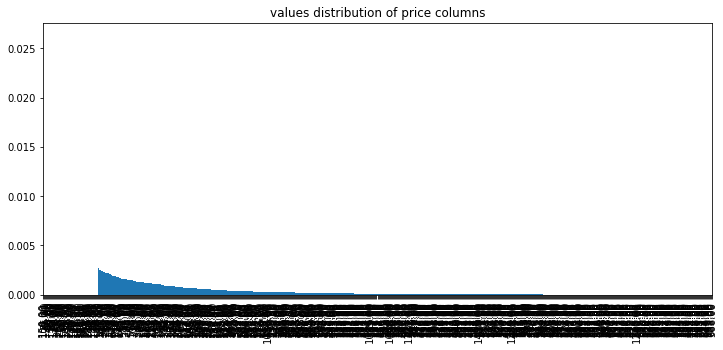

In [60]:
# check column value distribution.
for col in  obj2num_c_list:
    col_desc=assess_nonnumeric(clean_calendar,col)
    print(col_desc)

#### 3.1.3 Select and Re-Encode Features for calendar dataset
 - Select and Re-Encode Features
     - Convert columns type to target date type.
     - Re-Encode Categorical Features. Category columns get dummies. Depending on the number of categories, perform one of the following:
       - binary (two-level) categoricals with numeric values: do nothing.
       - binary variable with non-numeric values: re-encode the values as numbers or create a dummy variable.
       - Multi-level categoricals (three or more values): encode the values using multiple dummy variables or just drop them from the analysis. As always, document the choices in the Discussion section.
     - Engineer Mixed-Type Features
       - There are a handful of features that are marked as "mixed" columns in the dataset that require special treatment in order to be included in the analysis.
     - Complete Feature Selection.   To summarize, the dataframe should consist of the following:
       - All numeric, interval, and ordinal type columns from the original dataset.
       - Binary categorical features (all numerically-encoded).
       - Engineered features from other multi-level categorical features and mixed features.

##### 3.1.3.1 Convert columns type to target date type.

In [61]:
# convert date to datetime based on assesssment result.
for d in assess_result_c['datetime']:
    clean_calendar[d] = pd.to_datetime(clean_calendar[d])
clean_calendar[assess_result_c['datetime']].head()

date
0 2016-01-04
1 2016-01-05
2 2016-01-06
3 2016-01-07
4 2016-01-08

In [62]:
clean_calendar[assess_result_c['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 1 columns):
date    1393570 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.6 MB


##### 3.1.3.2 Re-Encode Categorical Features

The number of missing value of available columns is:0 
The available columns type is:object 
    index available
0   count   1393570
1  unique         2
2     top         t
3    freq    934542
0       t   0.67061
1       f   0.32939
0       t   0.67061
1       f   0.32939


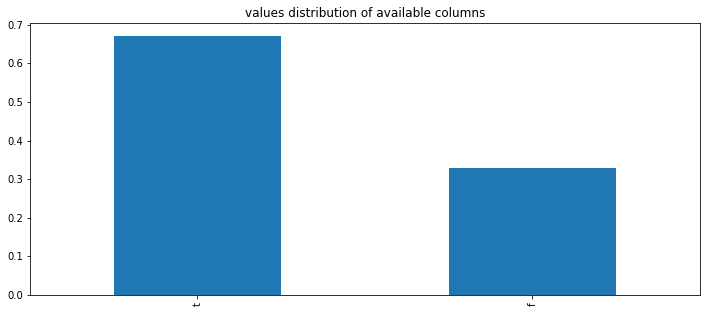

In [63]:
# binary variable with non-numeric values:convert available column to binary category

# check column value distribution.
for col in  dtypes_c_dict['bool']:
    col_desc=assess_nonnumeric(clean_calendar,col)
    print(col_desc)

In [64]:
# binary variable with non-numeric values:convert available column to binary category
mapping={'t':True,'f':False}
for col in dtypes_c_dict['bool']:
    clean_calendar[col]=clean_calendar[col].map(mapping)

clean_calendar[dtypes_c_dict['bool']].head()

available
0       True
1       True
2      False
3      False
4      False

##### 3.1.3.3 Engineer Mixed-Type Features

In [65]:
#NO Mixed type features

#### 3.1.3.4 Complete Feature Selection. 

To summarize, the dataframe should consist of the following:
 - All numeric, interval, and ordinal type columns from the original dataset.
 - Binary categorical features (all numerically-encoded).
 - Engineered features from other multi-level categorical features and mixed features.

In [66]:
get_base_info(clean_calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
available     1393570 non-null bool
date          1393570 non-null datetime64[ns]
price         934542 non-null object
listing_id    1393570 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 33.2+ MB

Show the dataset example:
   available       date  price  listing_id
0       True 2016-01-04  85.00      241032
1       True 2016-01-05  85.00      241032
2      False 2016-01-06    NaN      241032
3      False 2016-01-07    NaN      241032
4      False 2016-01-08    NaN      241032


#### 3.1.4 Feature transforming

  - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
  - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
  - Apply Feature Scaling
    - Normalize
    - Standardize

##### 3.1.4.1  imputation columns
   1. use mean, mode, averge as imputation value.
   2. or use ML prediction value as imputation value.

In [67]:
# impute numeric column
num_cols_list=flexiable_list(dtypes_c_dict['numeric'])
clean_calendar[num_cols_list]=clean_calendar[num_cols_list].fillna(0)
clean_calendar[num_cols_list].head()

price  listing_id
0  85.00      241032
1  85.00      241032
2      0      241032
3      0      241032
4      0      241032

In [68]:
clean_calendar['price']=clean_calendar['price'].astype(float)

In [69]:
get_base_info(clean_calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
available     1393570 non-null bool
date          1393570 non-null datetime64[ns]
price         1393570 non-null float64
listing_id    1393570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB

Show the dataset example:
   available       date  price  listing_id
0       True 2016-01-04   85.0      241032
1       True 2016-01-05   85.0      241032
2      False 2016-01-06    0.0      241032
3      False 2016-01-07    0.0      241032
4      False 2016-01-08    0.0      241032


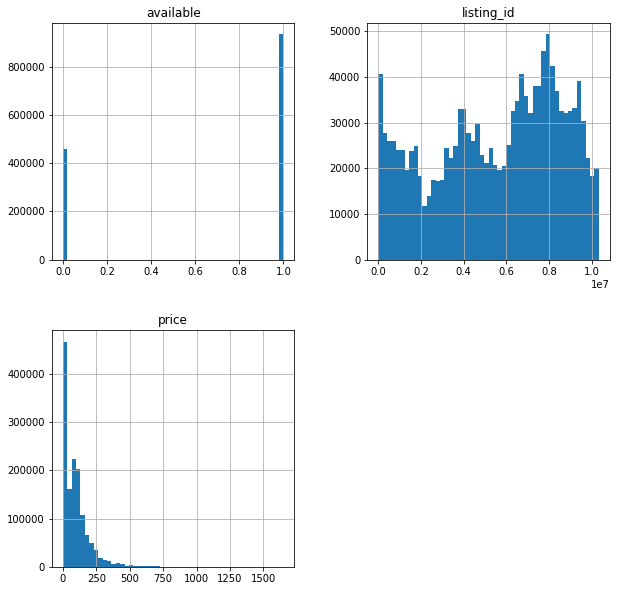

In [70]:
# check numeric columns distribution.
clean_calendar.select_dtypes(exclude=['datetime']).astype(float).hist(bins=50, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)
plt.show()

### 3.2 Data Preparation for listings dataset
#### 3.2.1 Prepare lists for data clean

In [79]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_l={}
# drop columns in no missing part.
assess_result_l['drop']=['state','smart_location','host_url','listing_url','picture_url','host_verifications',
                         'description','name','city','neighbourhood_cleansed','street','bed_type','amenities',
                         'require_guest_profile_picture','calendar_updated'] 
assess_result_l['datetime']=[]
assess_result_l['bool']=['is_location_exact','require_guest_phone_verification','instant_bookable']
assess_result_l['numeric']=['price','extra_people','amenities_length']
assess_result_l['category']=['neighbourhood_group_cleansed','room_type','cancellation_policy']
# drop columns in imputation part.
assess_result_l['drop'] +=['summary','host_about','last_review','host_picture_url','host_neighbourhood',
                                'neighborhood_overview','transit','host_thumbnail_url','host_name','space','xl_picture_url',
                                'first_review','host_location','neighbourhood','host_has_profile_pic']
assess_result_l['bool'] +=['host_is_superhost','host_identity_verified','medium_url','thumbnail_url']
assess_result_l['numeric'] +=['cleaning_fee','host_response_rate','host_since','host_acceptance_rate']
assess_result_l['category'] +=['zipcode','property_type','host_response_time']
#print(assess_result_l)

In [80]:
#adjust dtype columns list based on the assessment result
dtypes_l_dict=adjust_cols_list(listings,assess_result_l,drop_cols_l)


6 category columns are following:
 ['cancellation_policy', 'room_type', 'property_type', 'neighbourhood_group_cleansed', 'host_response_time', 'zipcode']

46 drop columns are following:
 ['state', 'smart_location', 'host_url', 'listing_url', 'picture_url', 'host_verifications', 'description', 'name', 'city', 'neighbourhood_cleansed', 'street', 'bed_type', 'amenities', 'require_guest_profile_picture', 'calendar_updated', 'summary', 'host_about', 'last_review', 'host_picture_url', 'host_neighbourhood', 'neighborhood_overview', 'transit', 'host_thumbnail_url', 'host_name', 'space', 'xl_picture_url', 'first_review', 'host_location', 'neighbourhood', 'host_has_profile_pic', 'requires_license', 'square_feet', 'calendar_last_scraped', 'scrape_id', 'country', 'country_code', 'weekly_price', 'license', 'jurisdiction_names', 'security_deposit', 'market', 'experiences_offered', 'has_availability', 'notes', 'last_scraped', 'monthly_price']

0 datetime columns are following:
 []

7 bool columns ar

##### 3.2.1.1 drop columns or rows

In [81]:
#clean the drop columns or rows
if len(assess_result_l['drop']) > 0:
    clean_listings_cols = minus_cols_list(all_cols_l_list,dtypes_l_dict['drop'])
    clean_listings= listings.loc[:,clean_listings_cols]
#get_base_info(clean_listings)

##### 3.2.1.2 handle data type for columns
Check if any columns are of different data types than you would expect ex: 
     - 1) numbers showing as strings
     - 2) String includes invisible char.

In [83]:
# clean special string in numeric columns
# because host_since is a date type, need  convert to numeric. so removed it from numeric columns
obj2num_l_list=minus_cols_list(assess_result_l['numeric'] , ['host_since','amenities_length'])
clean_listings[obj2num_l_list]=del_df_special_char(clean_listings.loc[:,obj2num_l_list],'$,%')

In [84]:
get_base_info(clean_listings[obj2num_l_list])

The dataset contains 3818 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
price                   3818 non-null object
host_response_rate      3295 non-null object
cleaning_fee            2788 non-null object
extra_people            3818 non-null object
host_acceptance_rate    3045 non-null object
dtypes: object(5)
memory usage: 149.2+ KB

Show the dataset example:
    price host_response_rate cleaning_fee extra_people host_acceptance_rate
0   85.00                 96          NaN         5.00                  100
1  150.00                 98        40.00         0.00                  100
2  975.00                 67       300.00        25.00                  100
3  100.00                NaN          NaN         0.00                  NaN
4  450.00                100       125.00        15.00                  NaN


In [85]:
# clear special char in zipcode column
clean_listings['zipcode']=clean_listings['zipcode'].str.replace('99\n98122','98122')

#### 3.2.3 Select and Re-Encode Features for listings dataset
 - Select and Re-Encode Features
     - Convert columns type to target date type.
     - Re-Encode Categorical Features. Category columns get dummies. Depending on the number of categories, perform one of the following:
       - binary (two-level) categoricals with numeric values: do nothing.
       - binary variable with non-numeric values: re-encode the values as numbers or create a dummy variable.
       - Multi-level categoricals (three or more values): encode the values using multiple dummy variables or just drop them from the analysis. As always, document the choices in the Discussion section.
     - Engineer Mixed-Type Features
       - There are a handful of features that are marked as "mixed" columns in the dataset that require special treatment in order to be included in the analysis.
     - Complete Feature Selection.   To summarize, the dataframe should consist of the following:
       - All numeric, interval, and ordinal type columns from the original dataset.
       - Binary categorical features (all numerically-encoded).
       - Engineered features from other multi-level categorical features and mixed features.

##### 3.2.3.1 Convert columns type to target date type.

###### handle 33 numeric columns :
 ['price', 'id', 'guests_included', 'accommodates', 'bathrooms', 'calculated_host_listings_count', 'host_acceptance_rate', 'review_scores_communication', 'cleaning_fee', 'availability_30', 'review_scores_cleanliness', 'review_scores_accuracy', 'reviews_per_month', 'review_scores_checkin', 'longitude', 'minimum_nights', 'review_scores_value', 'availability_365', 'bedrooms', 'latitude', 'host_response_rate', 'host_id', 'beds', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'extra_people', 'host_since', 'availability_90', 'host_listings_count', 'host_total_listings_count', 'review_scores_location', 'availability_60']

   - 'host_response_rate','host_acceptance_rate' are numeric type and need to be imputed.
   - 'cleaning_fee' is numeric type and need to be imputed as most frequent value.
   - 'host_since' are numeric type and can be converted to years since beginning.


In [94]:
aa={"a","b","c"}
len(aa)

3

In [96]:
# convert amenities to amenities's length based on assesssment result.
clean_listings['amenities_length']=listings['amenities'].apply(len)
clean_listings['amenities_length'].describe()

count    3818.000000
mean      200.060241
std        70.756117
min         2.000000
25%       155.000000
50%       198.000000
75%       245.000000
max       457.000000
Name: amenities_length, dtype: float64

In [97]:
# convert date to datetime based on assesssment result.
#Convert object to numeric.
obj2num_list_l=clean_listings[dtypes_l_dict['numeric']].select_dtypes(include=['object'])
print(obj2num_list_l.head())
print("\nassess numeric columnas result:\n {}".format(assess_result_l['numeric']))
print("\nAll numeric columns result:\n {}".format(dtypes_l_dict['numeric']))

  cleaning_fee   price host_acceptance_rate extra_people host_response_rate  \
0          NaN   85.00                  100         5.00                 96   
1        40.00  150.00                  100         0.00                 98   
2       300.00  975.00                  100        25.00                 67   
3          NaN  100.00                  NaN         0.00                NaN   
4       125.00  450.00                  NaN        15.00                100   

   host_since  
0  2011-08-11  
1  2013-02-21  
2  2014-06-12  
3  2013-11-06  
4  2011-11-29  

assess numeric columnas result:
 ['price', 'extra_people', 'amenities_length', 'cleaning_fee', 'host_response_rate', 'host_since', 'host_acceptance_rate']

All numeric columns result:
 ['availability_30', 'review_scores_rating', 'cleaning_fee', 'review_scores_location', 'price', 'minimum_nights', 'review_scores_checkin', 'bathrooms', 'id', 'number_of_reviews', 'host_acceptance_rate', 'longitude', 'review_scores_cleanliness',

In [98]:
current_date=datetime(2017,1,2)
detal_days=lambda x: (current_date-x).days
clean_listings['host_since']=pd.to_datetime(clean_listings['host_since']).apply(detal_days)

In [99]:
print("Is there any missing value in the column? {}".format(clean_listings['host_since'].isnull().sum()))

Is there any missing value in the column? 2


In [100]:
clean_listings[assess_result_l['numeric']]=clean_listings[assess_result_l['numeric']].astype(float)
get_base_info(clean_listings[assess_result_l['numeric']])

The dataset contains 3818 rows and 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
price                   3818 non-null float64
extra_people            3818 non-null float64
amenities_length        3818 non-null float64
cleaning_fee            2788 non-null float64
host_response_rate      3295 non-null float64
host_since              3816 non-null float64
host_acceptance_rate    3045 non-null float64
dtypes: float64(7)
memory usage: 208.9 KB

Show the dataset example:
   price  extra_people  amenities_length  cleaning_fee  host_response_rate  \
0   85.0           5.0             114.0           NaN                96.0   
1  150.0           0.0             243.0          40.0                98.0   
2  975.0          25.0             291.0         300.0                67.0   
3  100.0           0.0             197.0           NaN                 NaN   
4  450.0          15.0             181.0         125.0             

##### 3.2.3.2 Re-Encode Categorical Features

##### handle bool columns:
 ['medium_url','thumbnail_url' , 'host_is_superhost', 'instant_bookable', 'is_location_exact', 'require_guest_phone_verification', 'host_identity_verified']
   - 'medium_url','thumbnail_url' are category type and can be converted to  1 if value exit, or 0. it means airbnb are linked to social medium.
   - 'is_location_exact','require_guest_phone_verification','instant_bookable' are bool type and need imputation.
   - 'host_is_superhost','host_identity_verified' are bool type and need to be	imputed.


In [101]:
# binary variable with non-numeric values:
#convert 'medium_url','thumbnail_url'  column to binary category
clean_listings[['medium_url','thumbnail_url']]=clean_listings[['medium_url','thumbnail_url']].notnull()

The number of missing value of medium_url columns is:0 
The medium_url columns type is:bool 
    index medium_url
0   count       3818
1  unique          2
2     top       True
3    freq       3498
0    True   0.916186
1   False  0.0838135
0    True   0.916186
1   False  0.0838135
The number of missing value of require_guest_phone_verification columns is:0 
The require_guest_phone_verification columns type is:object 
    index require_guest_phone_verification
0   count                             3818
1  unique                                2
2     top                                f
3    freq                             3443
0       f                         0.901781
1       t                         0.098219
0       f                         0.901781
1       t                         0.098219
The number of missing value of is_location_exact columns is:0 
The is_location_exact columns type is:object 
    index is_location_exact
0   count              3818
1  unique                 2

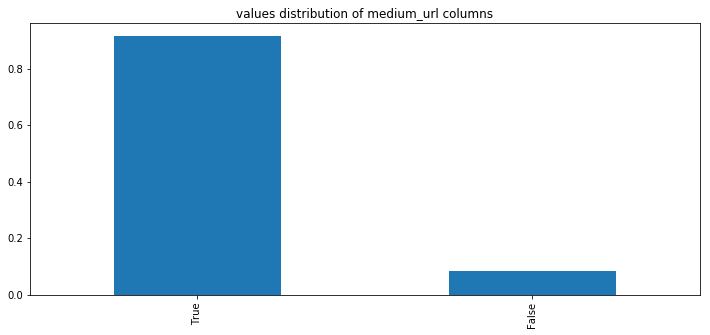

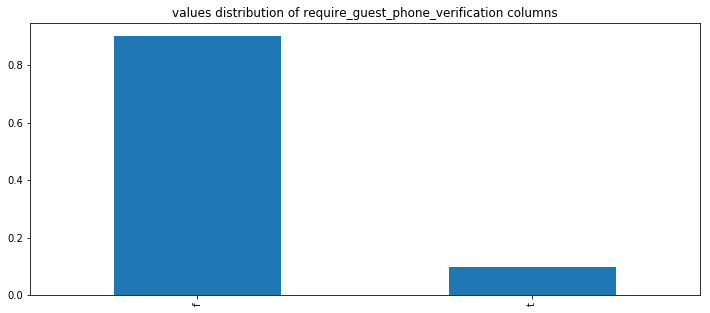

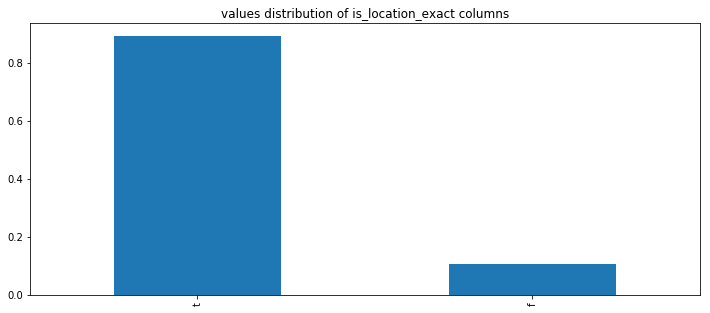

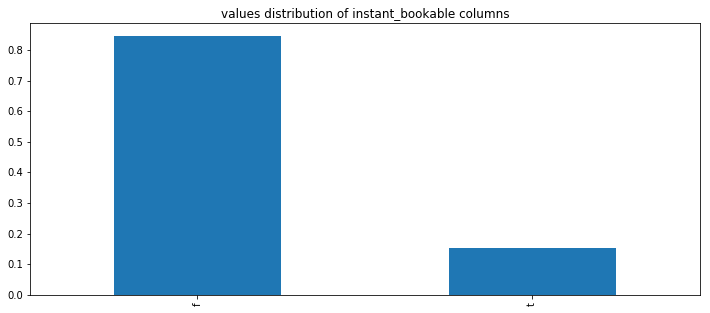

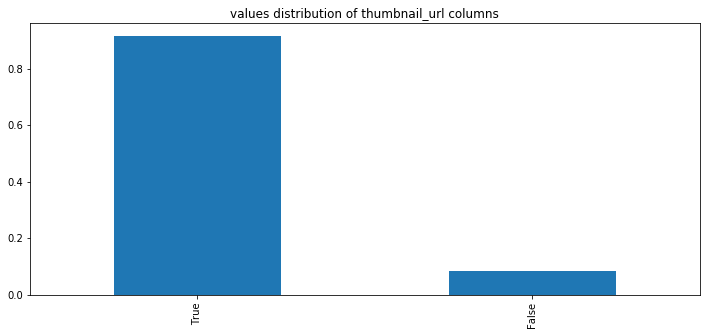

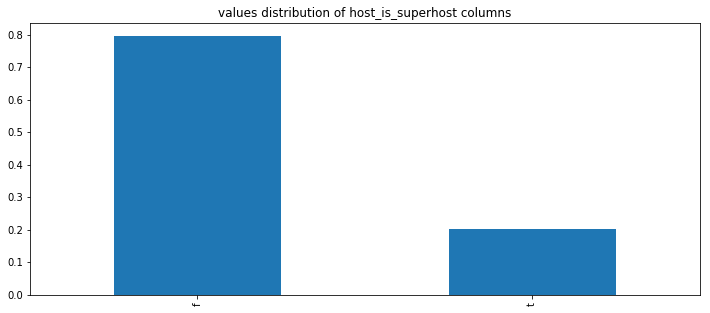

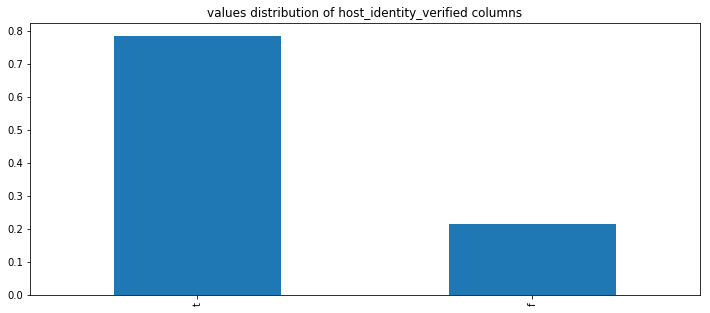

In [102]:
# check column value distribution.
for col in  dtypes_l_dict['bool']:
    col_desc=assess_nonnumeric(clean_listings,col)
    print(col_desc)

In [103]:
# binary variable with non-numeric values:convert available column to binary category
# clean_listings[bool_cols_l ]=clean_listings[bool_cols_l].applymap(mapping.get)
# clean bool columns. t=True, f=False
mapping={'t':True,'f':False}
for col in minus_cols_list(dtypes_l_dict['bool'],['medium_url','thumbnail_url']):
    clean_listings[col]=clean_listings[col].map(mapping)


In [104]:
clean_listings[assess_result_l['bool']]=clean_listings[assess_result_l['bool']].astype(bool)
clean_listings[assess_result_l['bool']].head()

is_location_exact  require_guest_phone_verification  instant_bookable  \
0               True                             False             False   
1               True                              True             False   
2               True                             False             False   
3               True                             False             False   
4               True                             False             False   

   host_is_superhost  host_identity_verified  medium_url  thumbnail_url  
0              False                    True       False          False  
1               True                    True        True           True  
2              False                    True       False          False  
3              False                    True       False          False  
4              False                    True       False          False

##### handle 8 category columns :
 ['cancellation_policy', 'zipcode', 'property_type', 'host_response_time', 'neighbourhood_group_cleansed', 'thumbnail_url', 'medium_url', 'room_type']
   - 'host_response_time' is category type and need to be	imputed.
   - 'neighbourhood_group_cleansed',	'room_type','cancellation_policy' are string/category type and need be converted to  dummies variable.
   - 'zipcode','property_type','host_response_time' are category type  and need to be	imputed. zipcode has invisible char and can be corrected. And proper_type has incorrect value(e.g. Bed & Breakfast), but the ratio is small and can be ignored.
   

In [105]:
clean_listings[dtypes_l_dict['category']].head()

cancellation_policy        room_type property_type  \
0            moderate  Entire home/apt     Apartment   
1              strict  Entire home/apt     Apartment   
2              strict  Entire home/apt         House   
3            flexible  Entire home/apt     Apartment   
4              strict  Entire home/apt         House   

  neighbourhood_group_cleansed  host_response_time zipcode  
0                   Queen Anne  within a few hours   98119  
1                   Queen Anne      within an hour   98119  
2                   Queen Anne  within a few hours   98119  
3                   Queen Anne                 NaN   98119  
4                   Queen Anne      within an hour   98119

In [106]:
clean_listings_dummy=pd.get_dummies(clean_listings[dtypes_l_dict['category']],dummy_na=True )

In [107]:
# remove oringal category columns 
clean_listings.drop(dtypes_l_dict['category'],inplace=True,axis=1)
# add category dummies
clean_listings = pd.concat([clean_listings,clean_listings_dummy],axis=1)
clean_listings.columns

Index(['availability_30', 'require_guest_phone_verification',
       'review_scores_rating', 'cleaning_fee', 'review_scores_location',
       'price', 'is_location_exact', 'minimum_nights', 'host_is_superhost',
       'maximum_nights',
       ...
       'zipcode_98126', 'zipcode_98133', 'zipcode_98134', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98199', 'zipcode_nan'],
      dtype='object', length=117)

##### 3.2.3.3 Engineer Mixed-Type Features

In [108]:
#No Mixed-Type columns

#### 3.2.3.4 Complete Feature Selection
To summarize, the dataframe should consist of the following:
 - All numeric, interval, and ordinal type columns from the original dataset.
 - Binary categorical features (all numerically-encoded).
 - Engineered features from other multi-level categorical features and mixed features.
 

In [109]:
get_base_info(clean_listings)

The dataset contains 3818 rows and 117 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 117 entries, availability_30 to zipcode_nan
dtypes: bool(7), float64(22), int64(12), uint8(76)
memory usage: 1.3 MB

colum number is too large. Transpose the columns to show 3 rows
117
                                                        0        1         2
availability_30                                        14       13         1
require_guest_phone_verification                    False     True     False
review_scores_rating                                   95       96        97
cleaning_fee                                          NaN       40       300
review_scores_location                                  9       10        10
price                                                  85      150       975
is_location_exact                                    True     True      True
minimum_nights                                          1        2  

#### 3.2.4 Feature transforming

  - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
  - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
  - Apply Feature Scaling
    - Normalize
    - Standardize

##### 3.2.4.1  imputation columns
   1. use mean, mode, averge as imputation value.
   2. or use ML prediction value as imputation value.
 

In [110]:
from sklearn.preprocessing import Imputer

In [111]:
# impute missing value of cleaning_fee column with most frequent value
cleaning_fee_mode= clean_listings['cleaning_fee'].mode().values[0]
clean_listings['cleaning_fee'].fillna(cleaning_fee_mode, inplace=True)
clean_listings['cleaning_fee'].isnull().sum()

0

In [112]:
# impute missing value of bool column with most frequent value
for col in dtypes_l_dict['bool']:
    bool_mode = clean_listings[col].mode().values[0]
    clean_listings[col].fillna(bool_mode, inplace=True)

In [113]:
# impute numeric column.
from sklearn.preprocessing import Imputer
before_imp_num_df=clean_listings[dtypes_l_dict['numeric']]
num_imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
np_num_imp=num_imp.fit_transform(before_imp_num_df.astype(np.float))
clean_listings_imp_num=pd.DataFrame(np_num_imp, columns=before_imp_num_df.columns)

In [114]:
# remove oringal numeric columns 
clean_listings.drop(dtypes_l_dict['numeric'],inplace=True,axis=1)
# add numeric dummies
clean_listings = pd.concat([clean_listings,clean_listings_imp_num],axis=1)

In [115]:
sorted(clean_listings.columns.values.tolist())

['accommodates',
 'amenities_length',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_nan',
 'cancellation_policy_strict',
 'cleaning_fee',
 'extra_people',
 'guests_included',
 'host_acceptance_rate',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_response_rate',
 'host_response_time_a few days or more',
 'host_response_time_nan',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'host_since',
 'host_total_listings_count',
 'id',
 'instant_bookable',
 'is_location_exact',
 'latitude',
 'longitude',
 'maximum_nights',
 'medium_url',
 'minimum_nights',
 'neighbourhood_group_cleansed_Ballard',
 'neighbourhood_group_cleansed_Beacon Hill',
 'neighbourhood_group_cleansed_Capitol Hill',
 'neig

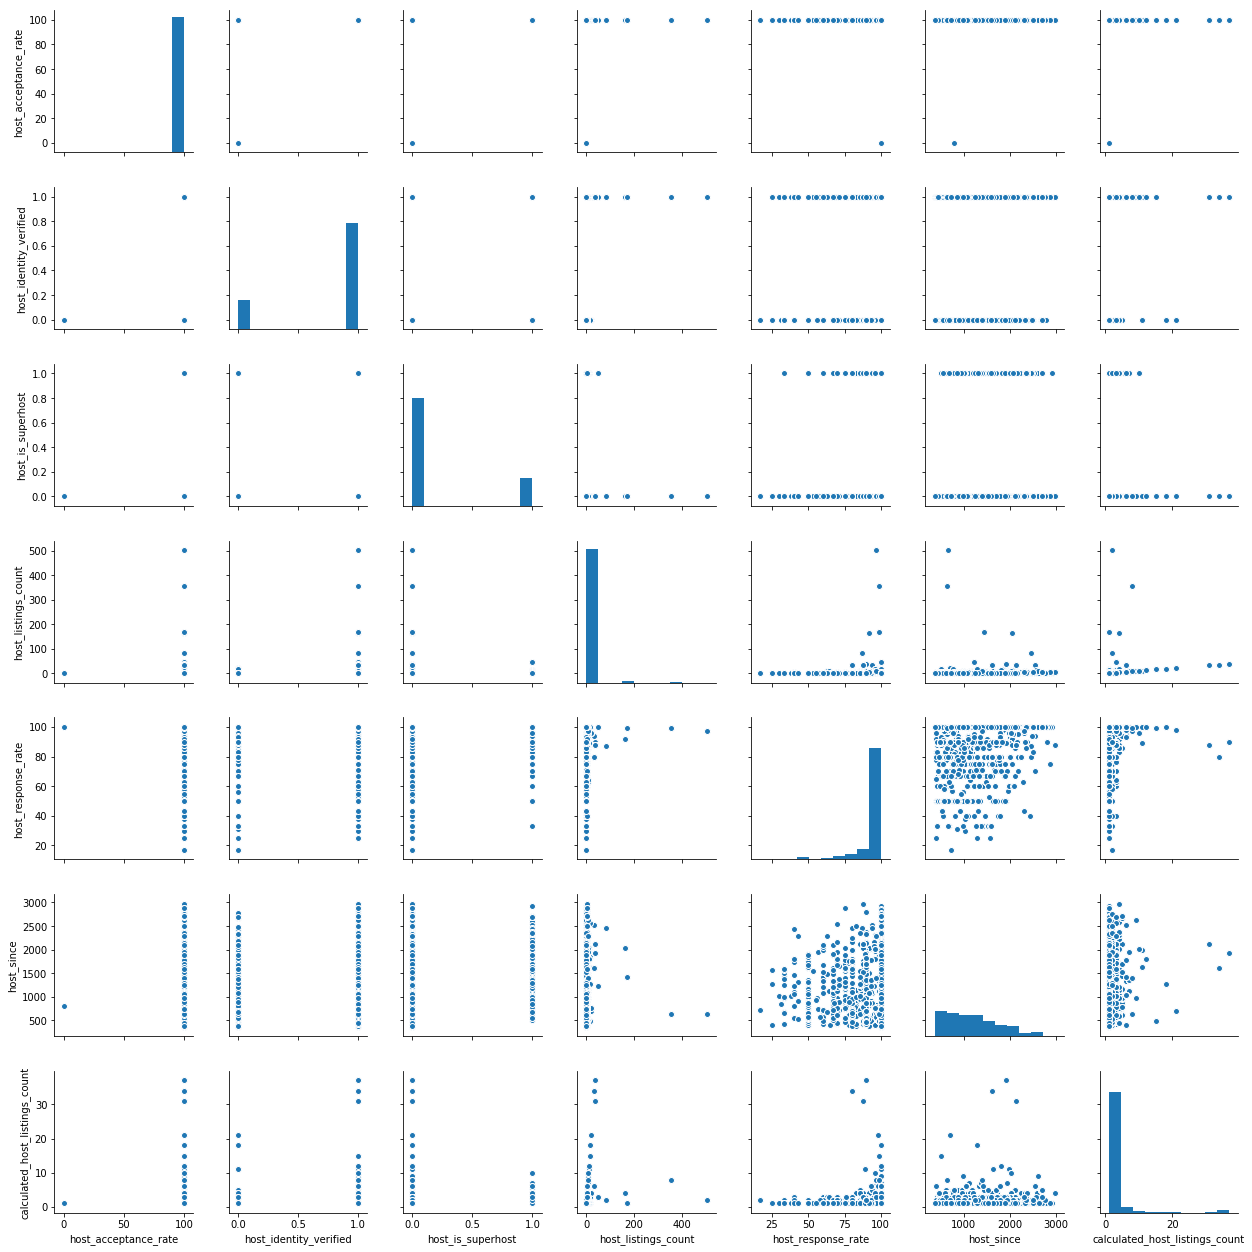

In [116]:
host_info_list= ['host_acceptance_rate',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_response_rate',
 'host_since',
 'calculated_host_listings_count']
clean_listings_num_host= clean_listings[host_info_list]
sns.pairplot(clean_listings_num_host);

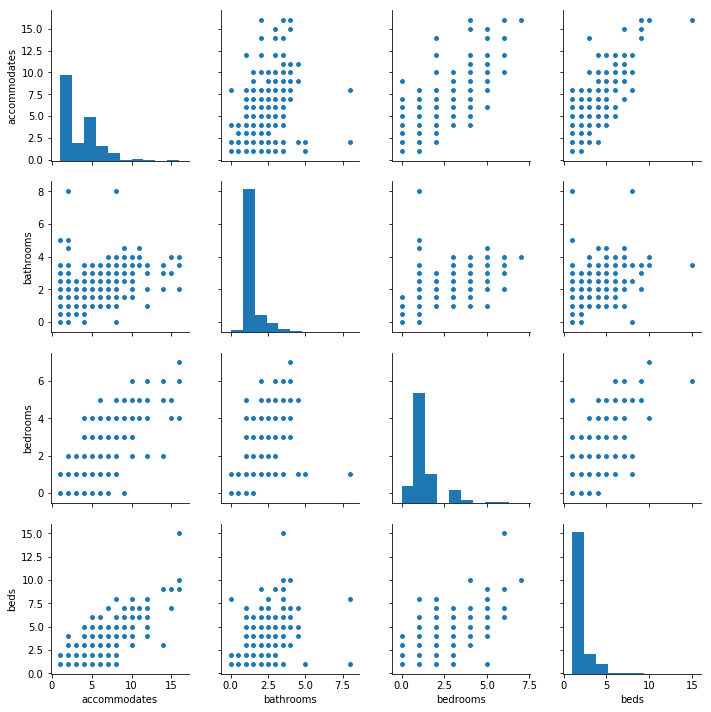

In [117]:
room_info_list=['accommodates',
 'bathrooms',
 'bedrooms',
 'beds' ]
sns.pairplot(clean_listings[room_info_list]);

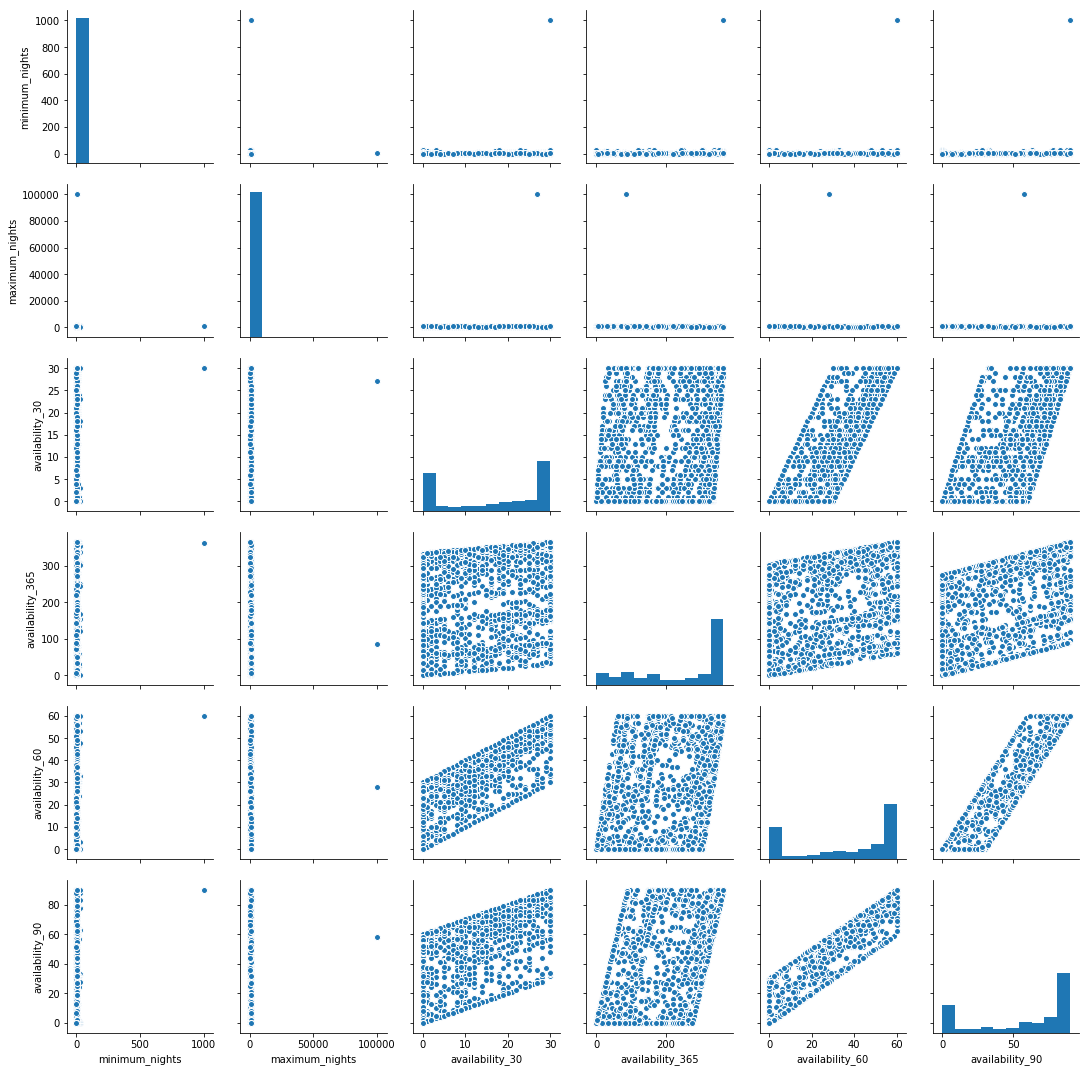

In [118]:
avail_info_list=[
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90']
sns.pairplot(clean_listings[avail_info_list]);

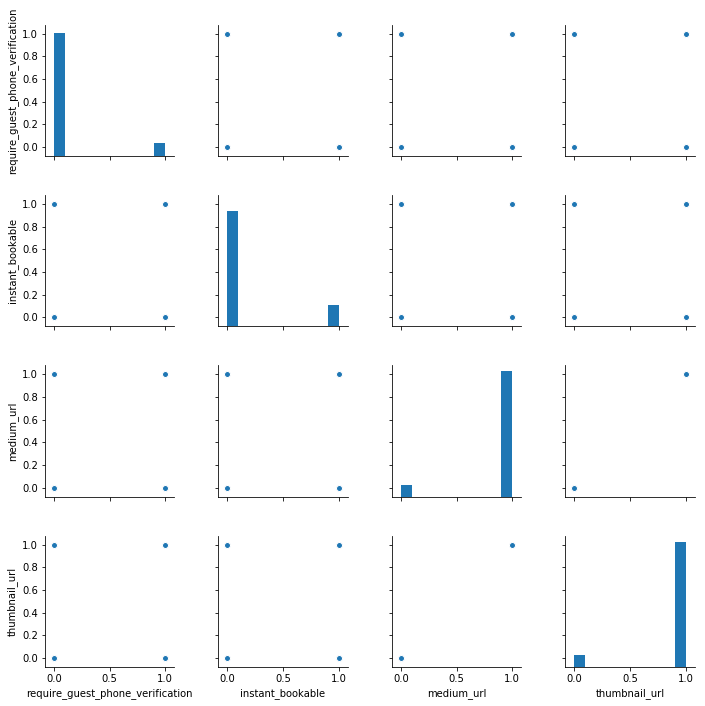

In [119]:
sns.pairplot(clean_listings[ [ 'require_guest_phone_verification','instant_bookable','medium_url', 'thumbnail_url']]);

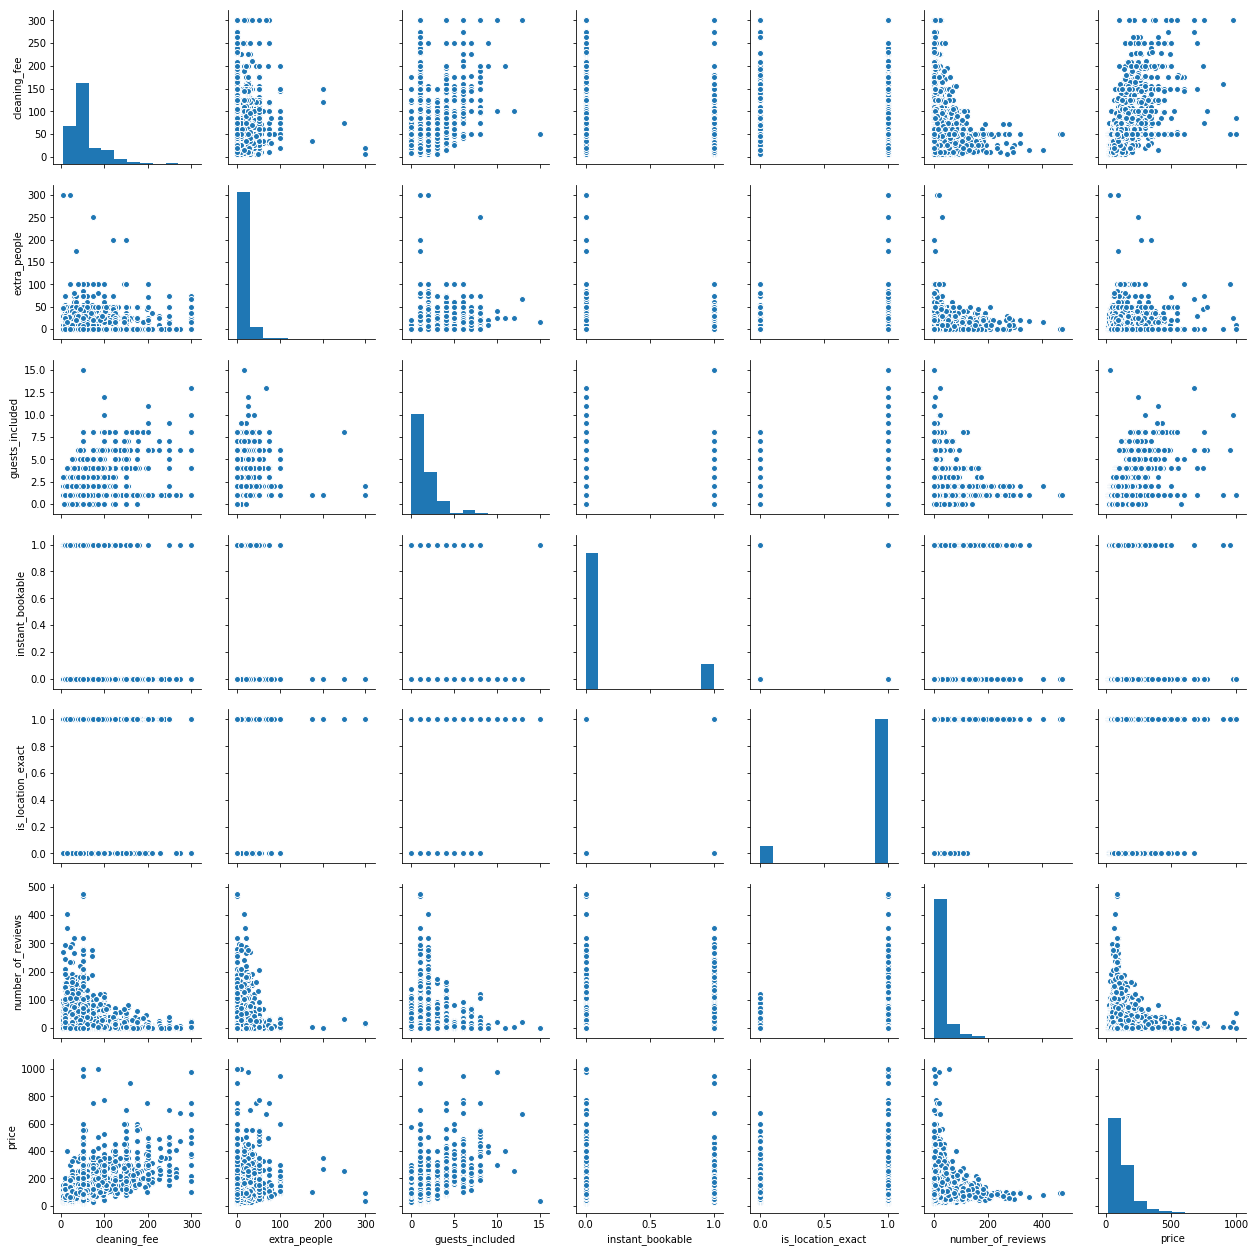

In [120]:
sales_info_list=['cleaning_fee',
 'extra_people',
 'guests_included',
 'instant_bookable',
 'is_location_exact',
 'number_of_reviews',
 'price' ]
sns.pairplot(clean_listings[sales_info_list]);    


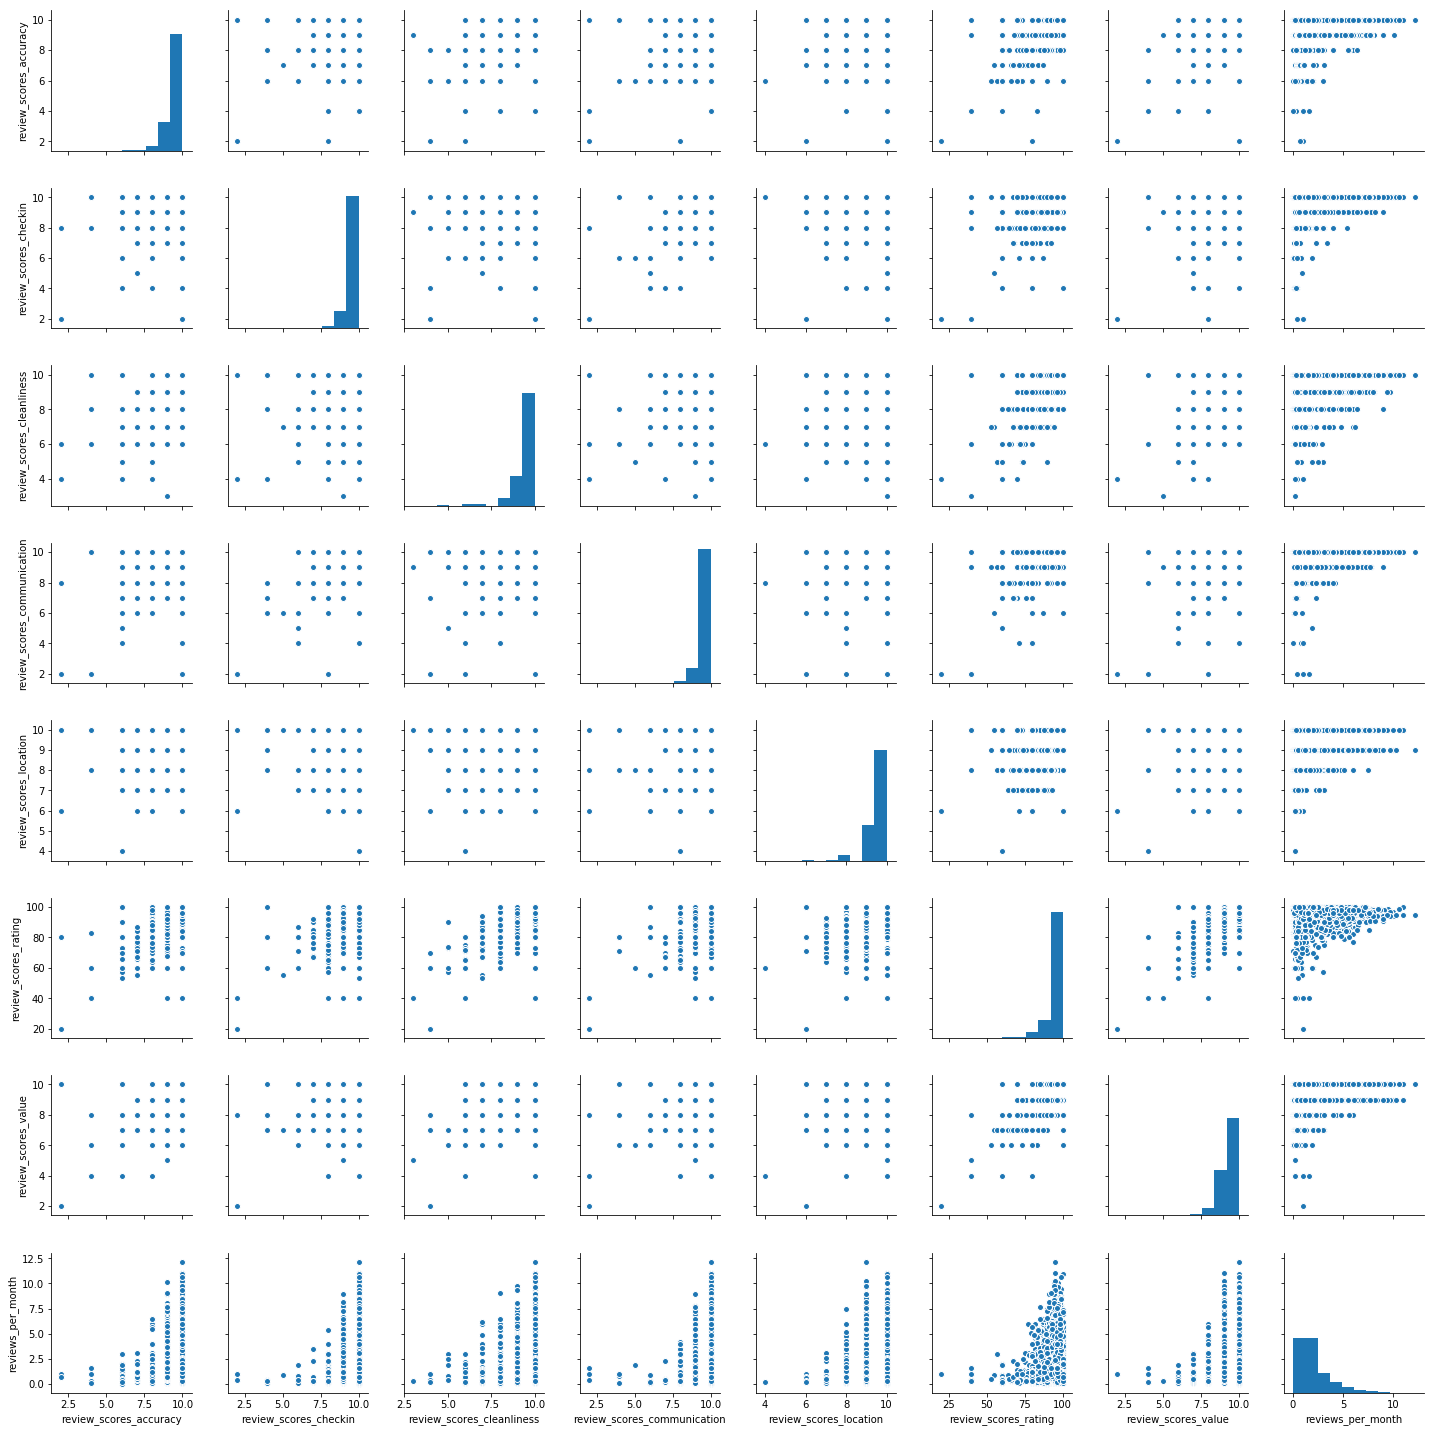

In [121]:
review_info_list=['review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month']
sns.pairplot(clean_listings[review_info_list]);   

price                        1.000000
accommodates                 0.652218
bedrooms                     0.627624
cleaning_fee                 0.598812
beds                         0.588989
bathrooms                    0.516009
guests_included              0.392875
amenities_length             0.165247
extra_people                 0.127961
host_total_listings_count    0.093879
Name: price, dtype: float64
review_scores_rating           1.000000
review_scores_value            0.688755
review_scores_cleanliness      0.642736
review_scores_accuracy         0.621557
review_scores_communication    0.545142
review_scores_checkin          0.525589
review_scores_location         0.377089
amenities_length               0.134682
host_response_rate             0.126267
reviews_per_month              0.074206
Name: review_scores_rating, dtype: float64


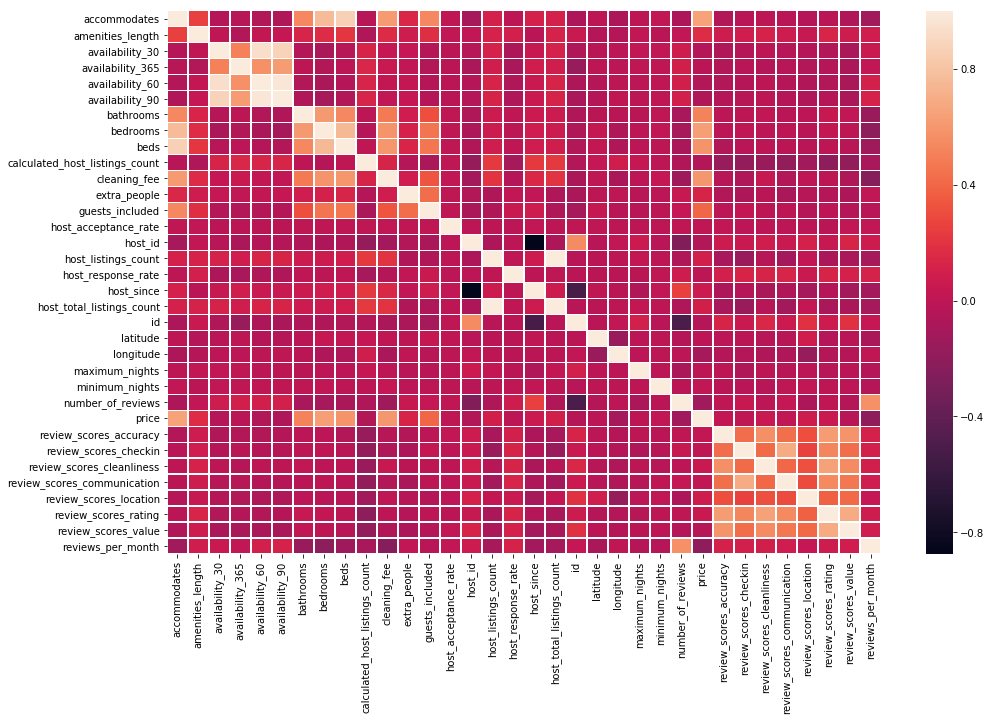

In [122]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,10))
corr = clean_listings[sorted(dtypes_l_dict['numeric'])].corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
print(corr['price'].sort_values(ascending=False)[:10])
print(corr['review_scores_rating'].sort_values(ascending=False)[:10])

- the ratings subscore tend to correlate with the overall rating, and the biggest correlates except rating so far with review_score_rating appear to be:
  - host_response_rate
- Location ratings doesn't really seem to factor into the overall rating
- Price/Cleaning fee look like they're greatly influenced by size elements (bathrooms, beds, guests, etc.)
- avaiability 30,60,90,365 are highly correlation.

In [123]:
#Make columns type clean that only inlcude basic type
get_base_info(clean_listings)

The dataset contains 3818 rows and 117 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 117 entries, require_guest_phone_verification to calculated_host_listings_count
dtypes: bool(7), float64(34), uint8(76)
memory usage: 1.3 MB

colum number is too large. Transpose the columns to show 3 rows
117
                                                        0            1  \
require_guest_phone_verification                    False         True   
is_location_exact                                    True         True   
host_is_superhost                                   False         True   
medium_url                                          False         True   
instant_bookable                                    False        False   
thumbnail_url                                       False         True   
host_identity_verified                               True         True   
cancellation_policy_flexible                            0          

### 3.3 Data Preparation for reviews dataset
#### 3.3.1 Prepare lists for data clean

##### Conclusion for review dataset
The dataset contains 84849 rows and 6 columns.
- 5 no missing columns are following:
  - 'listing_id', 'id',  'reviewer_id' are numeric columns. and they are already numeric column.
  - 'date' column should be converted to datetime type.
  - 'reviewer_name' column provides duplicated information and reviewer_id can replace it.
- 1 imputing columns are 'comments'. but missing value in comment cannot be imputed. but we can count it as occupation rate. so it can convert to bool type.

In [131]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_r={}
# drop columns in no missing part.
assess_result_r['drop']=['reviewer_name' ] 
assess_result_r['datetime']=['date']
assess_result_r['bool']=['comments']
assess_result_r['numeric']=[]
assess_result_r['category']=[]

In [132]:
#adjust dtype columns list based on the assessment result
dtypes_r_dict=adjust_cols_list(reviews,assess_result_r,drop_cols_r)


0 category columns are following:
 []

1 drop columns are following:
 ['reviewer_name']

1 datetime columns are following:
 ['date']

1 bool columns are following:
 ['comments']

3 numeric columns are following:
 ['id', 'reviewer_id', 'listing_id']


#### 3.3.2 data clean for reviews dataset
  - drop columns or rows
  - verify data type for columns. Check if any columns are of different data types than you would expect ex: 
     - 1) numbers showing as strings
     - 2) String includes invisible char.
     
##### 3.3.2.1 drop columns or rows


In [133]:
#remove drop colums from all columns and select them to clean dataset.
clean_reviews_cols = minus_cols_list(all_cols_r_list,dtypes_r_dict['drop'])
clean_reviews=reviews[clean_reviews_cols]

In [134]:
get_base_info(clean_reviews)

The dataset contains 84849 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 5 columns):
id             84849 non-null int64
reviewer_id    84849 non-null int64
date           84849 non-null object
comments       84832 non-null object
listing_id     84849 non-null int64
dtypes: int64(3), object(2)
memory usage: 3.2+ MB

Show the dataset example:
         id  reviewer_id        date  \
0  38917982     28943674  2015-07-19   
1  39087409     32440555  2015-07-20   
2  39820030     37722850  2015-07-26   
3  40813543     33671805  2015-08-02   
4  41986501     34959538  2015-08-10   

                                            comments  listing_id  
0  Cute and cozy place. Perfect location to every...     7202016  
1  Kelly has a great room in a very central locat...     7202016  
2  Very spacious apartment, and in a great neighb...     7202016  
3  Close to Seattle Center and all it has to offe...     7202016  
4  Kelly w

##### 3.3.1.2 handle data type for columns

In [135]:
#numbers showing as strings
# No numeric columns need to be handled.

#### 3.3.3 Select and Re-Encode Features for reviews dataset
       
##### 3.3.3.1 Convert columns type to target date type.

In [136]:
# convert date to datetime based on assesssment result.
for d in assess_result_r['datetime']:
    clean_reviews.loc[:,d] = pd.to_datetime(clean_reviews[d])
clean_reviews[assess_result_r['datetime']].head()

C:\Users\binwan\AppData\Local\Continuum\anaconda3\envs\aind\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


date
0 2015-07-19
1 2015-07-20
2 2015-07-26
3 2015-08-02
4 2015-08-10

In [137]:
clean_reviews[assess_result_r['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 1 columns):
date    84849 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 663.0 KB


##### 3.3.3.2 Re-Encode Categorical Features

In [138]:
# binary variable with non-numeric values:convert available column to binary category

# 1 imputing columns are 'comments'. but missing value in comment cannot be imputed. 
# we can count it as occupation rate. so it can convert to bool type.
clean_reviews[dtypes_r_dict['bool']].info()
clean_reviews_comments=clean_reviews['comments'].notnull()
# remove oringal  columns 
clean_reviews.drop(['comments'],inplace=True,axis=1)
# add new bool columns
clean_reviews = pd.concat([clean_reviews,clean_reviews_comments],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 1 columns):
comments    84832 non-null object
dtypes: object(1)
memory usage: 663.0+ KB


C:\Users\binwan\AppData\Local\Continuum\anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [139]:
clean_reviews[dtypes_r_dict['bool']].head()

comments
0      True
1      True
2      True
3      True
4      True

#### 3.3.4 Feature transforming

  - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
  - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
  - Apply Feature Scaling
    - Normalize
    - Standardize     
##### 3.3.4.1  imputation columns

In [140]:
# No numeric column need to be imputed.

In [141]:
#Make columns type clean that only inlcude basic type
get_base_info(clean_reviews)

The dataset contains 84849 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 5 columns):
id             84849 non-null int64
reviewer_id    84849 non-null int64
date           84849 non-null datetime64[ns]
listing_id     84849 non-null int64
comments       84849 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(3)
memory usage: 2.7 MB

Show the dataset example:
         id  reviewer_id       date  listing_id  comments
0  38917982     28943674 2015-07-19     7202016      True
1  39087409     32440555 2015-07-20     7202016      True
2  39820030     37722850 2015-07-26     7202016      True
3  40813543     33671805 2015-08-02     7202016      True
4  41986501     34959538 2015-08-10     7202016      True


In [142]:
clean_reviews_cols=clean_reviews.columns.values.tolist()
clean_reviews_cols.remove('date')
clean_reviews_cols

['id', 'reviewer_id', 'listing_id', 'comments']

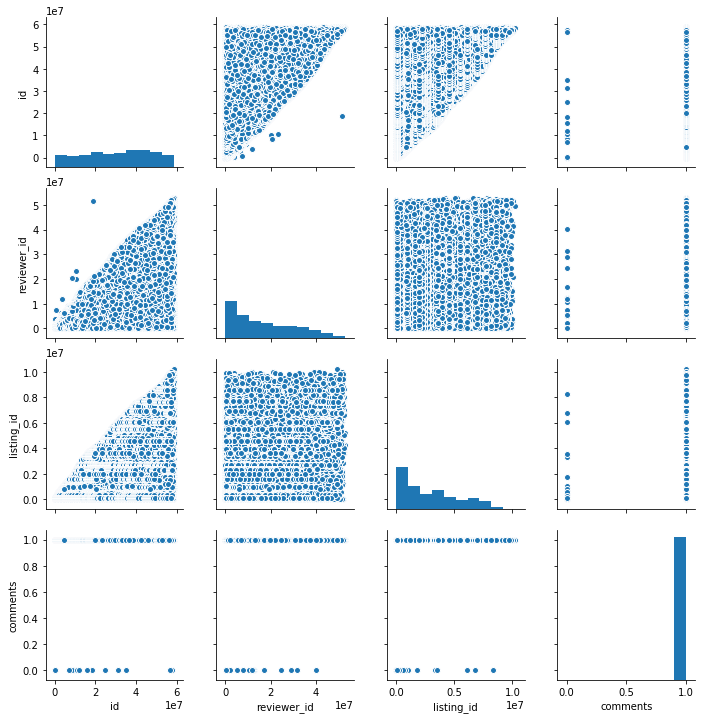

In [143]:
sns.pairplot(clean_reviews[clean_reviews_cols]);   

### Question 1: 同区域、同类型房子，价格在一年中如何变化？
#### 1 Prepare data

In [144]:
q1_calendar=clean_calendar.copy()
q1_listings=listings.copy()
#q1_calendar['date']=pd.to_datetime(q1_calendar['date'])
q1_calendar['month']=q1_calendar['date'].apply(lambda x: x.month)
select_col_list=["id","property_type",'neighbourhood_group_cleansed','zipcode']
q1=pd.merge(q1_calendar,q1_listings[select_col_list],left_on="listing_id",right_on="id",how="left")
q1["weekday"] = q1["date"].dt.weekday

In [145]:
#q1["weekday"] = q1["date"].dt.weekday
#mapping={'t':True,'f':False}
#q1["available"]=q1["available"].map(mapping)
get_base_info(q1)

The dataset contains 1393570 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 10 columns):
available                       1393570 non-null bool
date                            1393570 non-null datetime64[ns]
price                           1393570 non-null float64
listing_id                      1393570 non-null int64
month                           1393570 non-null int64
id                              1393570 non-null int64
property_type                   1393205 non-null object
neighbourhood_group_cleansed    1393570 non-null object
zipcode                         1391015 non-null object
weekday                         1393570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 107.6+ MB

Show the dataset example:
   available       date  price  listing_id  month      id property_type  \
0       True 2016-01-04   85.0      241032      1  241032     Apartment   
1    

In [146]:
q1_available = q1.groupby(["listing_id","month"])["available"].agg(["count","sum"])
q1_available["full_ratio"] = 1 - (q1_available["sum"]/q1_available["count"])
q1_available = q1_available.reset_index()
q1_available = pd.merge(q1_available,q1_listings[["id","property_type"]],
                        left_on="listing_id",right_on="id", how="left")

In [147]:
q1_available.head()

listing_id  month  count   sum  full_ratio    id property_type
0        3335      1     30   2.0    0.933333  3335           NaN
1        3335      2     29   1.0    0.965517  3335           NaN
2        3335      3     31  31.0    0.000000  3335           NaN
3        3335      4     30  30.0    0.000000  3335           NaN
4        3335      5     31  31.0    0.000000  3335           NaN

In [148]:
q1_price = q1[q1["available"]]
q1_price.head()

available       date  price  listing_id  month      id property_type  \
0        True 2016-01-04   85.0      241032      1  241032     Apartment   
1        True 2016-01-05   85.0      241032      1  241032     Apartment   
9        True 2016-01-13   85.0      241032      1  241032     Apartment   
10       True 2016-01-14   85.0      241032      1  241032     Apartment   
14       True 2016-01-18   85.0      241032      1  241032     Apartment   

   neighbourhood_group_cleansed zipcode  weekday  
0                    Queen Anne   98119        0  
1                    Queen Anne   98119        1  
9                    Queen Anne   98119        2  
10                   Queen Anne   98119        3  
14                   Queen Anne   98119        0

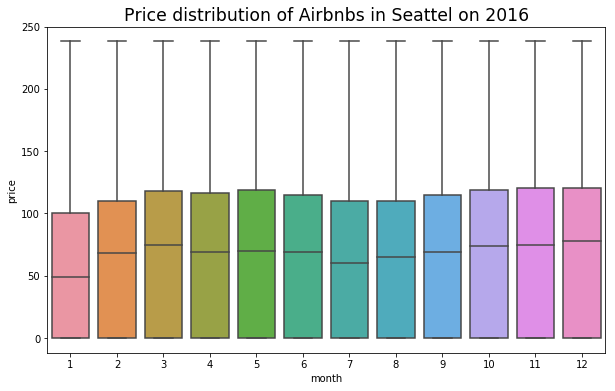

In [149]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(y="price",x="month",data=q1[q1["price"]<q1["price"].quantile(0.92)],ax=ax);
ax.set_title("Price distribution of Airbnbs in Seattel on 2016",fontsize="xx-large");

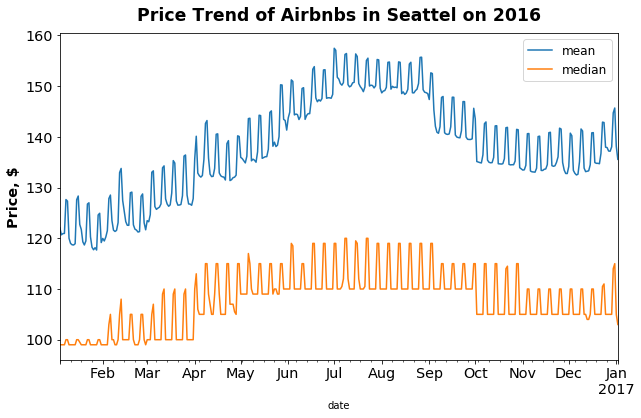

In [150]:
fig,ax = plt.subplots(figsize=(10,6))
q1_price.groupby("date")["price"].agg(["mean","median"]).plot(ax=ax,grid=False,fontsize="x-large");
ax.legend(fontsize="large")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
plt.title("Price Trend of Airbnbs in Seattel on 2016",fontsize="xx-large",fontweight="bold",y=1.02);
#plt.savefig("priceTrend.png",dpi=300,bbox_inches="tight")

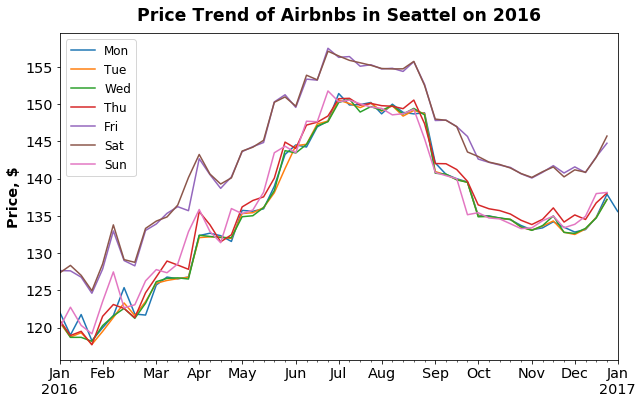

In [151]:
fig,ax = plt.subplots(figsize=(10,6))

a = q1_price.groupby(["date","weekday"])["price"].mean().unstack()

for col in a.columns:
    a[col].dropna().plot(ax=ax,fontsize="x-large")

ax.legend(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],fontsize="large");
ax.set_xlabel("")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
ax.grid(False)

plt.title("Price Trend of Airbnbs in Seattel on 2016",fontsize="xx-large",fontweight="bold",y=1.02);
#plt.savefig("priceTrend.png",dpi=300,bbox_inches="tight")

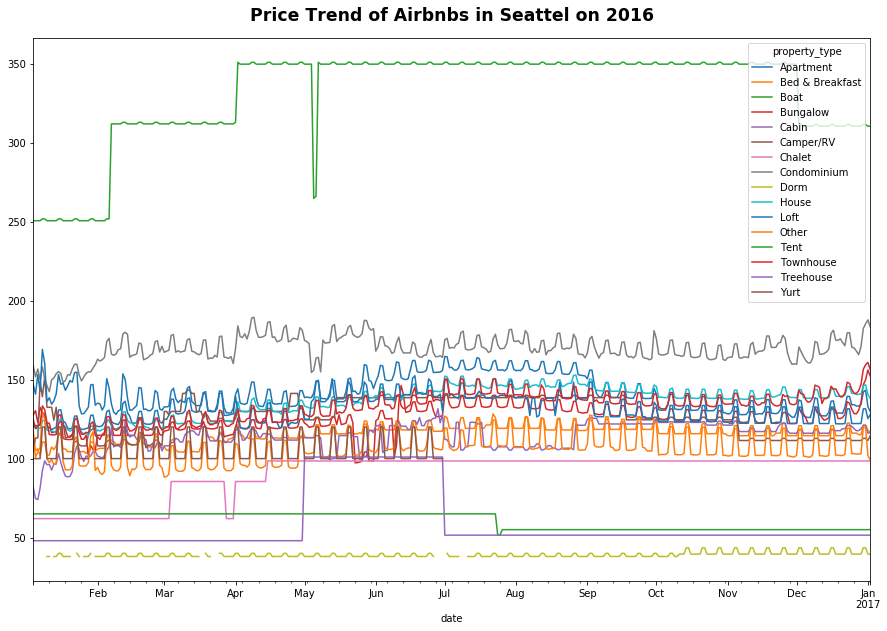

In [152]:
#fig,ax = plt.subplots(figsize=(10,6))

a = q1_price.groupby(["date","property_type"])["price"].mean().unstack()

for col in a.columns:
    a[col].dropna() #.plot(ax=ax,fontsize="x-large")

a.plot(figsize=(15,10))
#ax.legend(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],fontsize="large");
ax.set_xlabel("")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
ax.grid(False)

plt.title("Price Trend of Airbnbs in Seattel on 2016",fontsize="xx-large",fontweight="bold",y=1.02);
#plt.savefig("priceTrend.png",dpi=300,bbox_inches="tight")

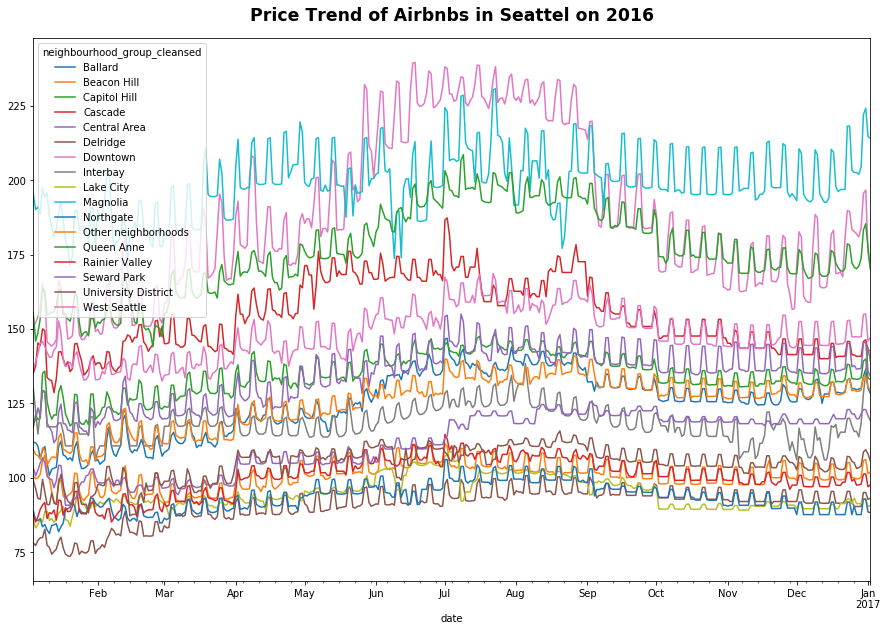

In [153]:
#fig,ax = plt.subplots(figsize=(10,6))

a = q1_price.groupby(["date","neighbourhood_group_cleansed"])["price"].mean().unstack()

for col in a.columns:
    a[col].dropna() #.plot(ax=ax,fontsize="x-large")

a.plot(figsize=(15,10))
#ax.legend(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],fontsize="large");
ax.set_xlabel("")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
ax.grid(False)

plt.title("Price Trend of Airbnbs in Seattel on 2016",fontsize="xx-large",fontweight="bold",y=1.02);
#plt.savefig("priceTrend.png",dpi=300,bbox_inches="tight")

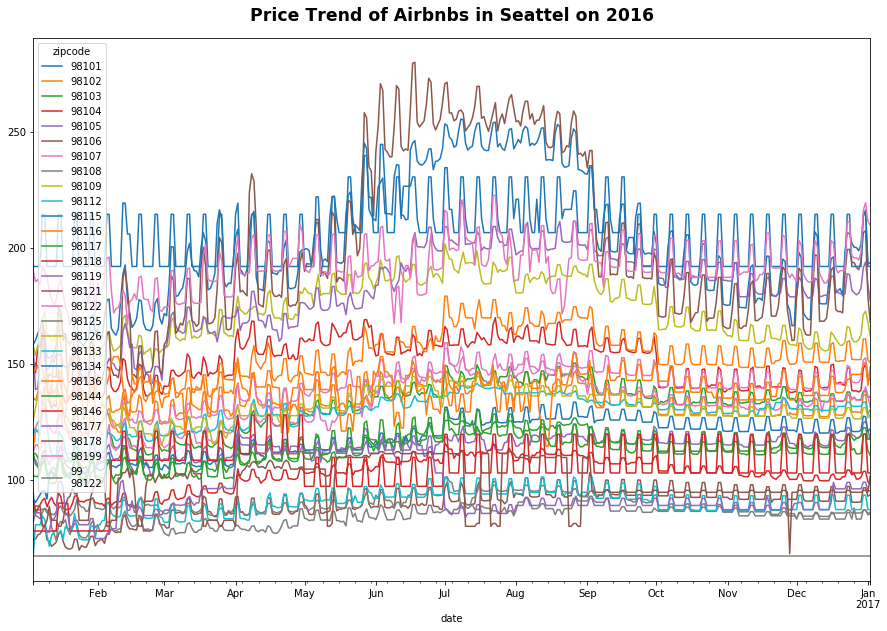

In [154]:
#fig,ax = plt.subplots(figsize=(10,6))

a = q1_price.groupby(["date","zipcode"])["price"].mean().unstack()

for col in a.columns:
    a[col].dropna()

a.plot(figsize=(15,10))
ax.set_xlabel("")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
ax.grid(False)

plt.title("Price Trend of Airbnbs in Seattel on 2016",fontsize="xx-large",fontweight="bold",y=1.02);
#plt.savefig("priceTrend.png",dpi=300,bbox_inches="tight")

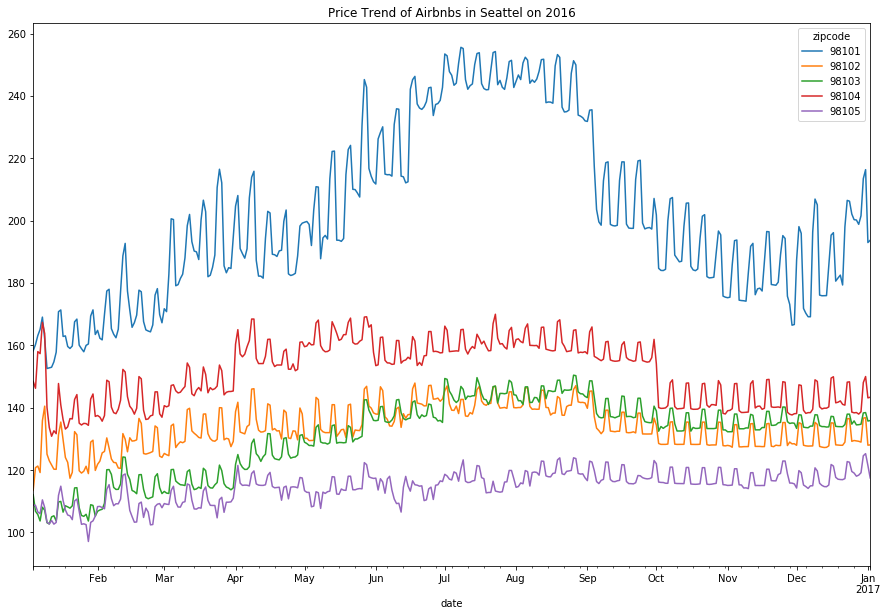

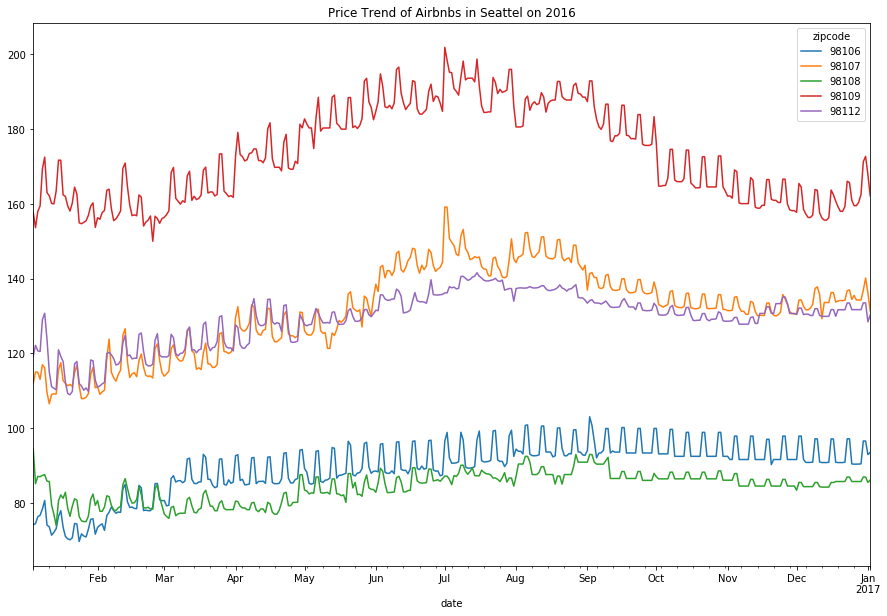

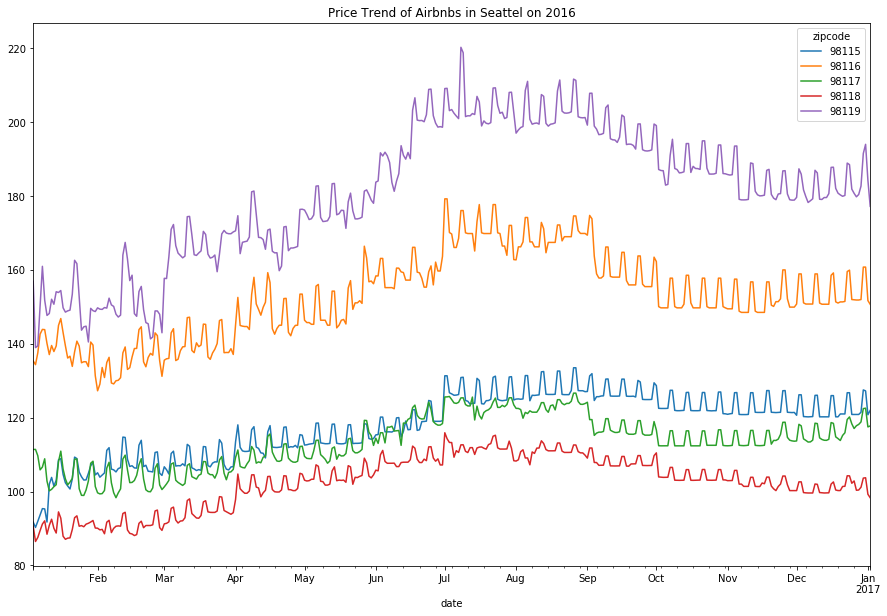

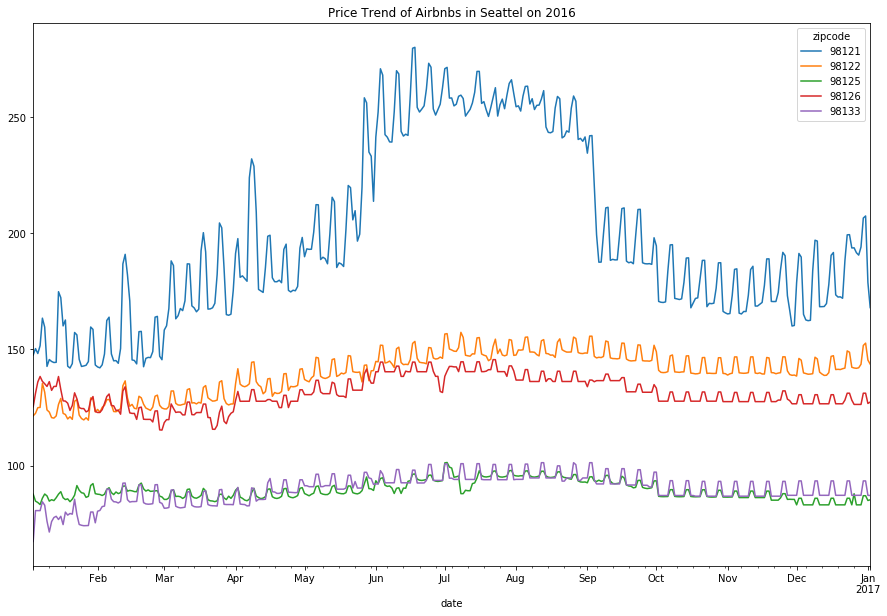

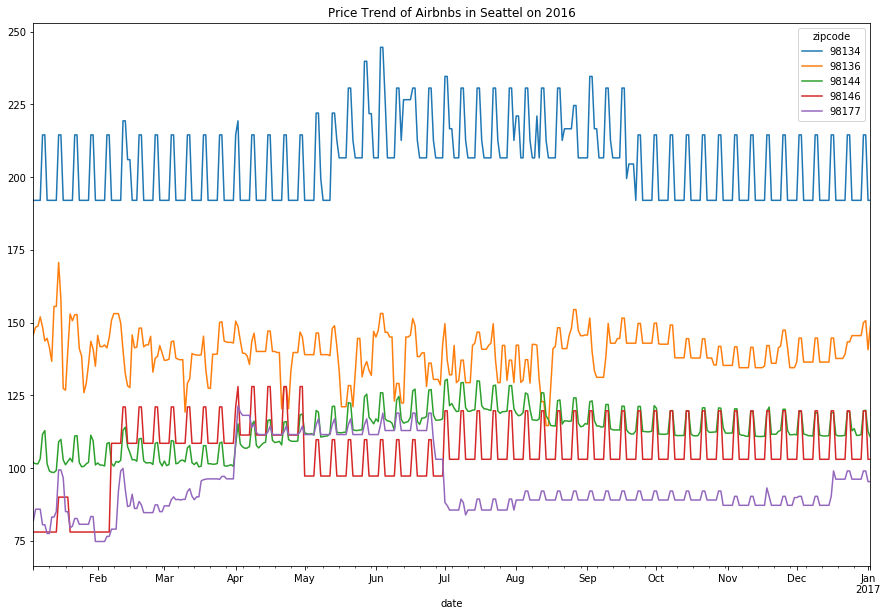

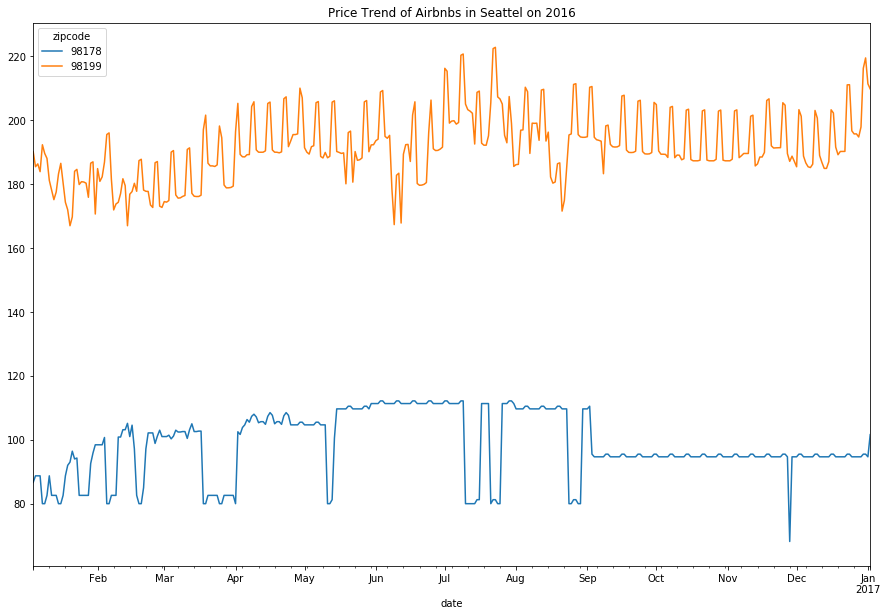

In [155]:
a = q1_price.groupby(["date","zipcode"])["price"].mean().unstack()
ax.set_xlabel("")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
ax.grid(False)
#plt.title("Price Trend of Airbnbs in Seattel on 2016",fontsize="xx-large",fontweight="bold",y=1.02);
for col in a.columns:
    a[col].dropna(inplace=True)
for i in range(0,a.shape[1],5):
    j=i+5
    if j > a.shape[1]:
        j =a.shape[1]-1
    a.iloc[:,i:j].plot(figsize=(15,10),title="Price Trend of Airbnbs in Seattel on 2016")



    


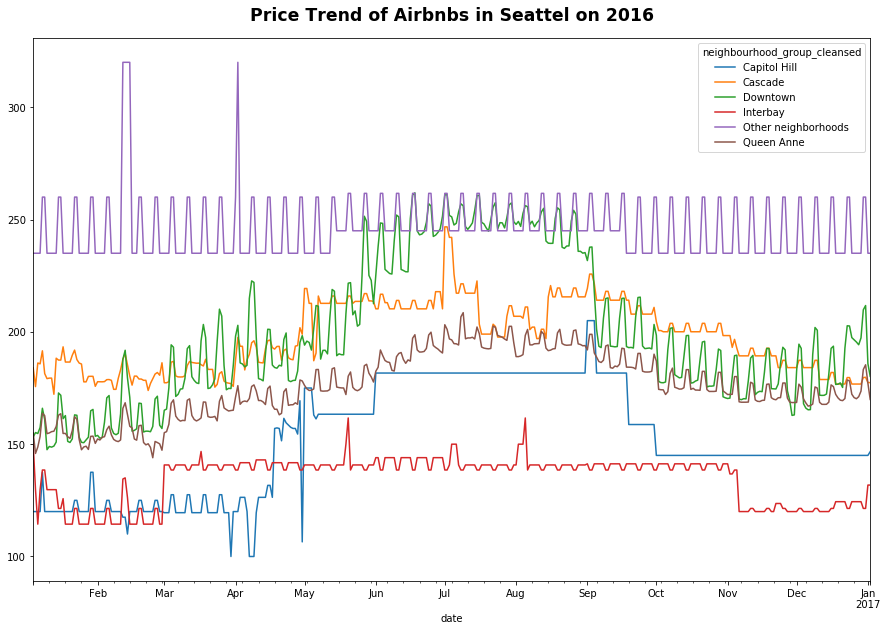

In [175]:
select_zipcode=['98101','98121','98119','98134','98109']
a = q1_price.loc[q1_price.zipcode.isin(select_zipcode),:].groupby(["date","neighbourhood_group_cleansed"])["price"].mean().unstack()

for col in a.columns:
    a[col].dropna() 

a.plot(figsize=(15,10))

ax.set_xlabel("")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
ax.grid(False)

plt.title("Price Trend of Airbnbs in Seattel on 2016",fontsize="xx-large",fontweight="bold",y=1.02);
#plt.savefig("priceTrend.png",dpi=300,bbox_inches="tight")

In [176]:
select_cols=['price','neighbourhood_group_cleansed','number_of_reviews','reviews_per_month']
q11=listings.loc[listings.zipcode.isin(select_zipcode),select_cols]
q11.groupby('neighbourhood_group_cleansed')
q11[q11['neighbourhood_group_cleansed'].isin(['Cascade','Interbay','Capitol Hill','Other neighborhoods'])]

price neighbourhood_group_cleansed  number_of_reviews  \
555    $85.00                      Cascade                  3   
556   $190.00                      Cascade                  7   
557    $65.00                      Cascade                  0   
558   $250.00                      Cascade                  0   
559    $69.00                      Cascade                  0   
560   $400.00                      Cascade                  8   
561   $150.00                      Cascade                  0   
562   $200.00                      Cascade                  0   
563   $141.00                      Cascade                 29   
564    $85.00                      Cascade                  2   
565   $775.00                      Cascade                  9   
566   $195.00                      Cascade                  0   
567   $249.00                      Cascade                  0   
568    $95.00                      Cascade                  6   
569   $122.00                      Cascade                 11   
570   $170.00                      Cascade                  2   
571    $65.00                      Cascade                  4   
1136  $125.00                      Cascade                  9   
1137   $55.00                      Cascade                 16   
1138  $550.00                      Cascade                  7   
1140  $100.00                      Cascade                  3   
1141   $95.00                      Cascade                  0   
1142  $110.00                      Cascade                  0   
1144  $100.00                      Cascade                  2   
1145   $90.00                      Cascade                  1   
1146  $100.00                      Cascade                  0   
1147   $88.00                      Cascade                  0   
1149  $183.00                      Cascade                 20   
1150  $135.00                      Cascade                  0   
1151  $220.00                      Cascade                 21   
1152  $183.00                      Cascade                  0   
1153  $115.00                      Cascade                  3   
1154  $100.00                      Cascade                  0   
1155  $183.00                      Cascade                 26   
1157   $75.00                      Cascade                  4   
1158  $110.00                      Cascade                  1   
1159  $183.00                      Cascade                  6   
1160  $220.00                      Cascade                 12   
1161  $119.00                      Cascade                  3   
1162   $75.00                      Cascade                  1   
1911   $53.00                     Interbay                 26   
1915   $69.00                     Interbay                  3   
1916  $250.00                     Interbay                  0   
1918   $50.00                     Interbay                  1   
1920  $150.00                     Interbay                 22   
1924  $265.00          Other neighborhoods                  0   
1925  $320.00          Other neighborhoods                  2   
1926  $150.00          Other neighborhoods                 49   
2809  $139.00                 Capitol Hill                  4   
2836  $100.00                 Capitol Hill                  4   
2859   $90.00                 Capitol Hill                 10   
2919  $140.00                 Capitol Hill                  7   
2925  $150.00                 Capitol Hill                 63   

      reviews_per_month  
555                0.09  
556                0.40  
557                 NaN  
558                 NaN  
559                 NaN  
560                0.26  
561                 NaN  
562                 NaN  
563                7.63  
564                1.62  
565                0.92  
566                 NaN  
567                 NaN  
568                0.57  
569                1.62  
570                0.26  
571                3.75  
1136               1.32  
113

In [177]:
a.head()

neighbourhood_group_cleansed  Capitol Hill     Cascade    Downtown  Interbay  \
date                                                                           
2016-01-04                           120.0  184.000000  153.177885    150.00   
2016-01-05                           120.0  175.625000  155.175879    129.75   
2016-01-06                           120.0  186.133333  154.741935    114.40   
2016-01-07                           120.0  185.764706  157.443787    129.75   
2016-01-08                           137.5  191.562500  165.988827    138.50   

neighbourhood_group_cleansed  Other neighborhoods  Queen Anne  
date                                                           
2016-01-04                                  235.0  155.016260  
2016-01-05                                  235.0  145.874074  
2016-01-06                                  235.0  148.732283  
2016-01-07                                  235.0  153.432203  
2016-01-08                                  260.0  163.732759

The number of missing value of property_type columns is:1 
The property_type columns type is:object 


index property_type
0        count          3817
1       unique            16
2          top         House
3         freq          1733
0        House      0.453903
1    Apartment      0.447355
2    Townhouse     0.0309062
3  Condominium     0.0238345
0    Treehouse   0.000785752
1       Chalet   0.000523834
2         Dorm   0.000523834
3         Yurt   0.000261917

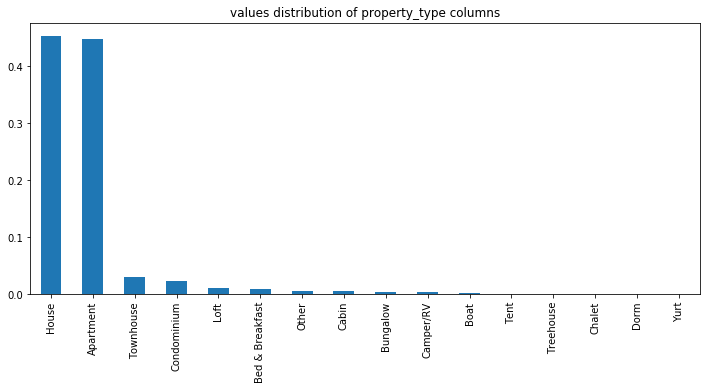

In [159]:
assess_nonnumeric(listings, 'property_type')

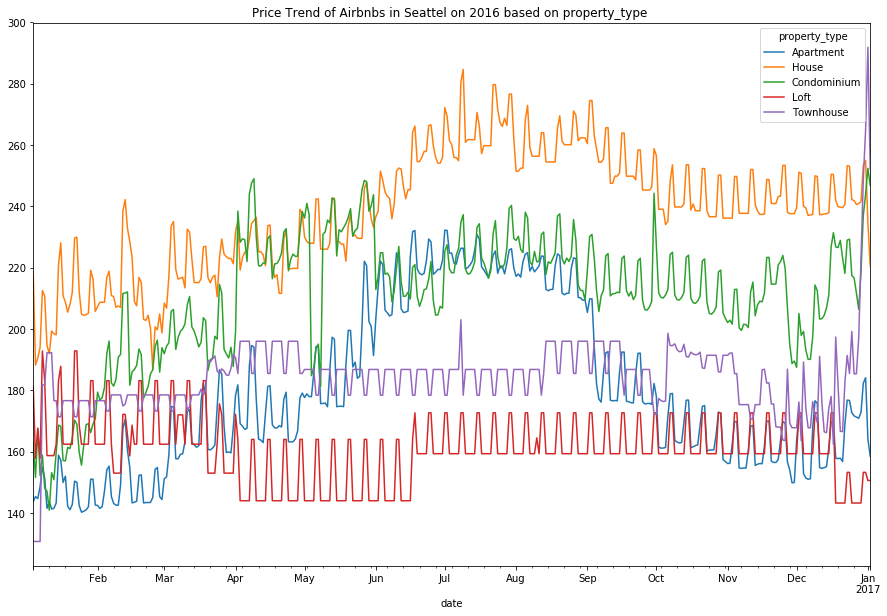

In [181]:
select_zipcode=['98101','98121','98119','98134','98109']
select_neighbourhood=['Downtown','Queen Anne','Cascade']
condition1 = q1_price.zipcode.isin(select_zipcode)
condition2 = q1_price.neighbourhood_group_cleansed. isin(select_neighbourhood)
condition = condition1&condition2
a = q1_price.loc[condition,:].groupby(["date","property_type"])["price"].mean().unstack()
ax.set_xlabel("")
ax.set_ylabel("Price, $", fontsize="x-large",fontweight="bold")
ax.grid(False)

for col in a.columns.values.tolist():
    a[col].dropna(inplace=True)
house_type=['Apartment','House','Condominium','Loft','Townhouse'] 
a[house_type].plot(figsize=(15,10),title="Price Trend of Airbnbs in Seattel on 2016 based on property_type ")

for i in range(0,a.shape[1],5):
    j=i+5
    if j > a.shape[1]:
        j =a.shape[1]-1
    #a.iloc[:,i:j].plot(figsize=(15,10),title="Price Trend of Airbnbs in Seattel on 2016 based on property_type ")


In [182]:
condition1 = listings.zipcode.isin(select_zipcode)
condition2 = q1_price.neighbourhood_group_cleansed. isin(select_neighbourhood)
condition = condition1 & condition2

select_cols=['price','neighbourhood_group_cleansed','number_of_reviews','reviews_per_month','property_type']
q11=listings.loc[condition,select_cols]
q11.groupby('property_type')
q11[q11['property_type'].isin(['Dorm','Condominum','Bed & Breakfast'])]
q11['property_type'].value_counts()

Apartment          430
House               83
Condominium         38
Townhouse           11
Loft                 7
Other                5
Boat                 4
Bungalow             3
Camper/RV            3
Dorm                 2
Bed & Breakfast      1
Name: property_type, dtype: int64

In [162]:
listings['accommodates'].value_counts().reset_index()['index'].values[0]

2

In [183]:
condition3 = listings.property_type.isin(house_type)
condition = condition&condition3
room_type =['accommodates','bathrooms','bedrooms','beds' ]
select_cols_list=select_cols +room_type 
q11=listings.loc[condition,select_cols_list]
q11.head()

price neighbourhood_group_cleansed  number_of_reviews  \
0    $85.00                   Queen Anne                207   
1   $150.00                   Queen Anne                 43   
9   $150.00                   Queen Anne                 32   
10   $95.00                   Queen Anne                181   
14  $461.00                   Queen Anne                 18   

    reviews_per_month property_type  accommodates  bathrooms  bedrooms  beds  
0                4.07     Apartment             4        1.0       1.0   1.0  
1                1.48     Apartment             4        1.0       1.0   1.0  
9                1.55     Apartment             4        1.0       1.0   1.0  
10               3.33         House             2        1.0       1.0   1.0  
14               2.65         House            16        3.5       6.0  15.0

In [184]:
q111=q11.groupby('property_type')
#tt= q111[room_type].agg(lambda x: x.value_counts().index[0]).reset_index()
tt= q111[room_type].agg(pd.Series.mode).reset_index()

print(tt)
for col in room_type:
    tmp=q11[col].value_counts().reset_index()['index'].values[0]
    print("{} mode is : {}".format(col,tmp))
q111[room_type].mean()

  property_type accommodates  bathrooms  bedrooms  beds
0     Apartment            2        1.0       1.0   1.0
1   Condominium            4        1.0       1.0   2.0
2         House            2        1.0       1.0   1.0
3          Loft       [2, 4]        1.0       1.0   1.0
4     Townhouse            2        1.0       1.0   1.0
accommodates mode is : 2
bathrooms mode is : 1.0
bedrooms mode is : 1.0
beds mode is : 1.0


accommodates  bathrooms  bedrooms      beds
property_type                                             
Apartment          3.397674   1.177570  1.072430  1.667442
Condominium        3.526316   1.171053  1.210526  1.736842
House              4.481928   1.638554  2.024096  2.409639
Loft               3.285714   1.071429  1.000000  1.857143
Townhouse          2.818182   1.500000  1.363636  1.545455

The number of missing value of price columns is:0 
The price columns type is:object 


index      price
0    count        385
1   unique        123
2      top    $150.00
3     freq         25
0  $150.00  0.0649351
1  $175.00  0.0493506
2  $100.00  0.0441558
3   $99.00  0.0363636
0   $45.00  0.0025974
1  $167.00  0.0025974
2  $171.00  0.0025974
3  $131.00  0.0025974

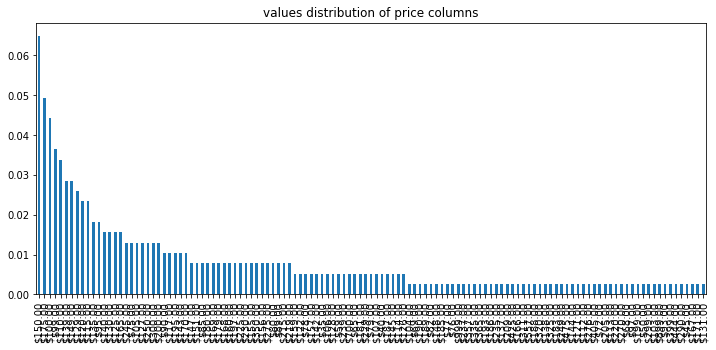

In [165]:
assess_nonnumeric(q11.loc[q11['neighbourhood_group_cleansed'].isin(['Downtown']),:],'price')

什么影响房屋租赁价格？

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,mean_squared_error

y = clean_listings['price']
x = clean_listings.drop('price', axis =1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

fr = RandomForestRegressor(n_estimators=600, criterion='mse',random_state=3,n_jobs=-1)
fr.fit(X_train, y_train)
y_train_pred = fr.predict(X_train)
y_test_pred = fr.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 435.348, test: 3017.454
R^2 train: 0.948, test: 0.606


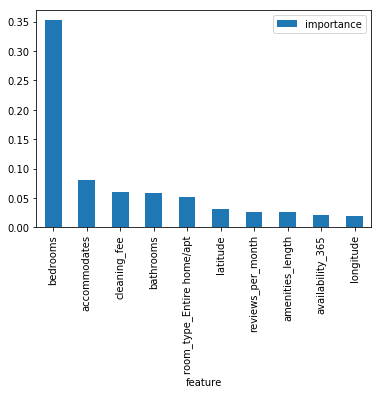

In [167]:
#Look at outputs
importances = fr.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

factors impacting price:
- room 
    - bedrooms, accomodates, type
    - amenities
- location
- reviews

all this factors impact the price.

什么影响房屋出租率？

In [168]:
y = clean_listings['reviews_per_month']
x = clean_listings.drop('reviews_per_month', axis =1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

fr1 = RandomForestRegressor(n_estimators=300, criterion='mse',random_state=3,n_jobs=-1)
fr1.fit(X_train, y_train)
y_train_pred = fr1.predict(X_train)
y_test_pred = fr1.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.037, test: 0.340
R^2 train: 0.987, test: 0.885


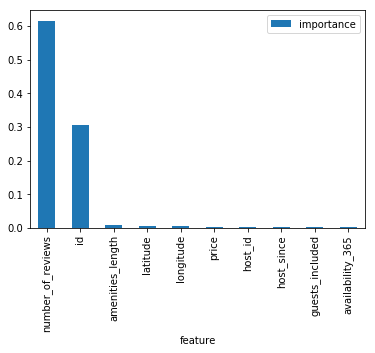

In [169]:
#Look at outputs
importances = fr1.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [170]:
y = clean_listings['number_of_reviews']
x = clean_listings.drop('number_of_reviews', axis =1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

fr2 = RandomForestRegressor(n_estimators=300, criterion='mse',random_state=3,n_jobs=-1)
fr2.fit(X_train, y_train)
y_train_pred = fr2.predict(X_train)
y_test_pred = fr2.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 16.239, test: 206.293
R^2 train: 0.988, test: 0.872


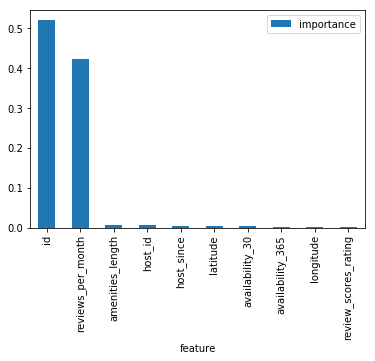

In [171]:
#Look at outputs
importances = fr2.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

## Test Area

In [172]:
# Analysis avaiable days and price
occu_calendar = clean_calendar[clean_calendar['date']<=datetime(2016,12,31)].copy()
occu_calendar['month'] = occu_calendar['date'].apply(lambda x: x.month)
occu_calendar.head()

available       date  price  listing_id  month
0       True 2016-01-04   85.0      241032      1
1       True 2016-01-05   85.0      241032      1
2      False 2016-01-06    0.0      241032      1
3      False 2016-01-07    0.0      241032      1
4      False 2016-01-08    0.0      241032      1

In [ ]:
occu_group_c=occu_calendar.loc[occu_calendar['available']==True,['price','listing_id','month']].groupby(['listing_id','month'])

In [ ]:
clean_calendar.loc[(clean_calendar['available']==True)&(clean_calendar['listing_id']==3335),:].head()

In [ ]:
# calculate available days per month 
avail_count=occu_group_c.size()
mean_price=occu_group_c.price.mean()
group_df=pd.concat([avail_count, mean_price], axis=1)
group_df.rename(columns={0:'avail_days_per_month','price':'month_price'}, inplace = True )
group_df=group_df.reset_index()
group_df.head()

In [ ]:
gd=group_df.groupby('listing_id')['avail_days_per_month', 'month_price']
group_df['avail_days_per_year']=gd.transform('sum')['avail_days_per_month']
group_df['year_avg_price']=gd.transform('mean')['month_price']
group_df.head()

In [ ]:
# Analysis occupation nights and price
occu_listings = clean_listings[['id', 'price', 'cleaning_fee','minimum_nights', 'number_of_reviews','reviews_per_month']].copy()
occu_listings['total_price']=(occu_listings['price']+occu_listings['cleaning_fee'])
occu_listings['estimate_nights']=occu_listings['minimum_nights']*occu_listings['number_of_reviews']
occu_listings['estimate_incomes']=occu_listings['total_price']*occu_listings['estimate_nights']

In [ ]:
occu_listings['total_price']=(occu_listings['price']+occu_listings['cleaning_fee'])

In [ ]:
# Get the nights and incomes by years
occu_listings['estimate_nights_per_month']=occu_listings['estimate_nights']/12
occu_listings['estimate_incomes_per_month']=occu_listings['estimate_incomes']/12
occu_listings.head()

In [ ]:
group_df_tmp.info()

In [ ]:
group_df_tmp=group_df.merge(occu_listings, left_on='listing_id', right_on='id')
select_listings_cols = group_df.columns.values.tolist()
select_listings_cols +=['minimum_nights','number_of_reviews','reviews_per_month','total_price','estimate_nights','estimate_incomes','estimate_nights_per_month','estimate_incomes_per_month']
group_df = group_df_tmp[select_listings_cols]
group_df.info()

In [ ]:
listings['number_of_reviews'].value_counts()

In [ ]:
group_df.head(10)

In [ ]:
a=group_df['estimate_nights_per_month'].mean()

In [ ]:
b=group_df['estimate_incomes_per_month'].mean()

In [ ]:
b/a

In [ ]:
group_df['number_of_reviews'].sum()

In [ ]:
group_df['minimum_nights'].mean()

In [ ]:
e=group_df['estimate_nights']/group_df['avail_days_per_year']
e.mean()

In [ ]:
get_base_info(listings)

In [ ]:
# Analysis reviews days and price
select_date=(clean_reviews['date']>=datetime(2016,1,1))&(clean_reviews['date']<=datetime(2016,12,31))
occu_reviews = clean_reviews[select_date].copy()
occu_reviews['month'] = occu_reviews['date'].apply(lambda x: x.month)
occu_reviews.head()

In [ ]:
#occu_group_r=occu_reviews.loc[occu_reviews['comments']==True,['listing_id','month']].groupby(['listing_id','month'])
occu_group_r=occu_reviews.loc[:,['listing_id','month']].groupby(['listing_id','month'])

In [ ]:
review_count=occu_group_r.size()
review_count
# it only 217 record, so it may be not used to estimate occupation rate

In [ ]:
# calculate reviews days per month 
review_count=occu_group_r.size()
group_df=pd.concat([avail_count, mean_price], axis=1)
group_df.rename(columns={0:'avail_days_per_month','price':'month_price'}, inplace = True )
group_df=group_df.reset_index()
group_df.head(30)
group_df.info()

In [ ]:
clean_reviews['date'].describe()

In [ ]:
clean_calendar.head(10)

In [ ]:
clean_listings.info()

In [ ]:
clean_reviews.info()

In [ ]:
#clean_reviews.columns
#['date', 'price', 'listing_id', 'available']
occu_reviews = clean_reviews[clean_reviews['date']<=datetime(2016,12,31)].copy()
occu_reviews['month'] = occu_reviews['date'].apply(lambda x: x.month)
occu_reviews.head()

### Clean Calendar dataset

In [ ]:
calendar.loc[calendar['price'].isnull(), ['available','price']].groupby(['available']).count()

Based on above result, missing price rooms are all unavailble.

In [ ]:
#calendar_clean=calendar.loc[calendar['price'].notnull(),:].copy()

In [ ]:
# Get the data type of listings
print(listings.info())
# analyze missing data rate for columns in listings
listings_missing_rate=listings.isnull().mean()*100
print(listings_missing_rate)
# Get the listings example
listings.head()

In [ ]:
# Get the data type of reviews
print(reviews.info())
# analyze missing data rate for columns in reviews
reviews_missing_rate=reviews.isnull().mean()*100
print(reviews_missing_rate)
# Get the listings example
reviews.head()

In [ ]:
# Check missing data in row distribution 
reviews_missing_row=reviews.isnull().mean(axis=1)*100
bins=[0,5,10,15,20,25,30,40,50,60,80,100]
reviews_missing_row_cuts=pd.cut(reviews_missing_row,bins)
pd.value_counts(reviews_missing_row_cuts, sort=False).plot('bar')